In [2]:
# imports

# make notebook span width of browser window, for convenience
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
np.warnings.filterwarnings('ignore')


# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
# for jupyter notebooks to show plots inline
%matplotlib inline 
#%matplotlib

from astropy.table import Table
from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord

from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection


import pandas as pd 
pd.set_option('display.max_columns', 500) # convenient for 


In [3]:
# define paths

version = 'DR1'
#root = '/Users/grudnick/Work/GOGREEN/Data/Releases/'
#root = '/Users/mbalogh/projects/GOGREEN/data/Data/Releases/'
root = 'C:/Users/panda/Desktop/GOGREEN_Working/'
dirr  =  root + version + '/'
#specdir = dirr + 'SPECTROSCOPY/'
catdir = dirr + 'CATS/'
photdir = dirr + 'PHOTOMETRY/'
#imdir = photdir + 'IMAGES/'
#oneddir = specdir + 'OneD/'
#twoddir = specdir + 'TwoD/'

In [4]:
# define cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

### Read in cluster catalog

In [5]:
clusters = catdir + 'Clusters.fits'

# read in fits data table with astropy.table.Table and immediately convert to pandas Dataframe
cluster_table = Table( fits.getdata( clusters ) ).to_pandas() 
cluster_table['cluster'] = cluster_table['cluster'].str.rstrip().values # remove unnecessary spaces

print(cluster_table.columns)
cluster_table

Index(['cluster', 'fullname', 'cluster_id', 'RA_Best', 'DEC_Best', 'RA_GMOS',
       'DEC_GMOS', 'PA_deg', 'Redshift', 'vdisp', 'vdisp_err', 'gogreen_m1',
       'gogreen_m2', 'gogreen_m3', 'gogreen_m4', 'gogreen_m5', 'gogreen_m6',
       'gclass_m1', 'gclass_m2', 'gclass_m3', 'gclass_m4', 'gclass_m5',
       'Kphot_cat', 'photoz_cat', 'stelmass_cat', 'IMAGE_U', 'IMAGE_B',
       'IMAGE_G', 'IMAGE_V', 'IMAGE_R', 'IMAGE_I', 'IMAGE_Z', 'IMAGE_J',
       'IMAGE_J1', 'IMAGE_Y', 'IMAGE_K', 'IMAGE_IRAC1', 'Preimage'],
      dtype='object')


,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,COSMOS-125,COSMOS-125,14,150.620804,2.167500,150.627197,2.159200,270.0,1.40400,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo
1,COSMOS-221,COSMOS-221,14,150.561996,2.503100,150.570206,2.498600,90.0,1.19600,200.0,50.0,GS2014BLP001-05,GS2015ALP001-01,GS2016ALP001-01,GS2019ALP001-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-221_pseudo
2,COSMOS-28,COSMOS-28,14,149.469193,1.668500,149.459305,1.675030,78.0,1.31600,285.0,75.0,GN2015BLP004-03,GN2019ALP004-01,GN2019ALP004-02,GN2019ALP004-03,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-28_pseud
3,COSMOS-63,COSMOS-63,14,150.358994,1.935200,150.361465,1.928342,165.0,1.17220,NaN,70.0,GN2015BLP004-02,,,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-63_pseudo
4,SPT0205,SPT-CL J0205-5829,1,31.451000,-58.480301,31.438959,-58.482900,90.0,1.32270,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
5,SPT0546,SPT-CL J0546-5345,2,86.640297,-53.761002,86.656197,-53.758000,0.0,1.06690,977.0,68.0,GS2014BLP001-09,GS2014BLP001-10,GS2015BLP001-16,GS2017BLP001-12,GS2015BLP001-15,GS2017BLP001-13,,,,,,SPTCL-0546_totalall_FOURSTARKs.cat,SPTCL-0546_totalall_Ks.zout,SPTCL-0546_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20141001S0139_add
6,SPT2106,SPT-CL J2106-5844,3,316.519104,-58.741100,316.519135,-58.741100,100.0,1.13066,1055.0,83.0,GS2018ALP001-01,GS2018ALP001-02,GS2018BLP001-04,GS2019ALP001-01,GS2018BLP001-05,,,,,,,SPTCL-2106_totalall_HAWKIKs.cat,SPTCL-2106_totalall_Ks.zout,SPTCL-2106_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20150411S0405_add
7,SXDF49,SXDF49XGG,13,34.499599,-5.064900,34.537060,-5.069708,73.0,1.09100,255.0,50.0,GN2015BLP004-01,GS2018BLP001-01,GS2018BLP001-02,GS2018BLP001-03,GN2018BLP004-01,GS2014BLP001-07,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF49_pseudo
8,SXDF64,SXDF64XGG,13,34.331902,-5.206700,34.323750,-5.171400,180.0,0.91600,530.0,80.0,GS2014BLP001-08,GS2015BLP001-02,,,,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF64_pseudo
9,SXDF76,SXDF76XGG,13,34.746101,-5.304100,34.736118,-5.321800,350.0,1.45900,520.0,180.0,GS2014BLP001-02,GS2015BLP001-03,GN2018BLP004-02,GN2018BLP004-03,GN2018BLP004-04,,,,,,,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,SPLASH_SXDF_Mehta_v1p6.fits,,,,,,,,,,,,,GMISXDF76_pseudo


### read in photometry catalog

In [37]:
photfile = catdir+'Photo.fits'

phot_table = Table( fits.getdata(photfile) ).to_pandas()
#phot_table = phot_table.drop(labels=['UMINV'], axis=1) #dropping UMINV because it has been established there is an offset
#of around 0.09 to these values for whatever reason. We will get more accurate values from the restframe_colors files.
print (phot_table.columns)
#phot_table.head(20)
#print(phot_table['cPHOTID'])
phot_table.head(1)

Index(['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec',
       'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ',
       'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot',
       'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot',
       'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot',
       'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot',
       'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot',
       'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot',
       'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot',
       'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot',
       'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot',
       'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot',
       'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot',
       'enuv_tot', 'emips24_tot

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631,1.123,0.0,0.0,0.0,9.549926e+10,5.958668,NaN,66.154896,147.93197,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,535.962,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Read in spectroscopy catalog

In [7]:
zcatfile = catdir + 'Redshift_catalogue.fits'

# read in fits data table with astropy.table.Table and immediately convert to pandas Dataframe
redshift_table = Table( fits.getdata( zcatfile ) ).to_pandas() 
redshift_table['Cluster'] = redshift_table['Cluster'].str.rstrip().values # remove unnecessary spaces

print (redshift_table.columns)
redshift_table.head(5)

Index(['Cluster', 'SPECID', 'RA(J2000)', 'DEC(J2000)', 'OBJClass', 'Redshift',
       'Redshift_Quality', 'EXTVER', 'Spec_Flag', 'SNR_8500_VAR',
       'SNR_8500_RMS', 'D4000', 'eD4000', 'EWOII', 'eEWOII', 'EWHdelta',
       'eEWHdelta', 'EWOII_model', 'eEWOII_model', 'F_OII', 'eF_OII',
       'SFR_OII', 'eSFR_OII', 'delta_BIC', 'member_Clean', 'member_EM',
       'member'],
      dtype='object')


,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136,5.405303,4.758426,11.549834,1.890590,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464,3.249191,1.707648,4.091792,0.768290,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0
3,COSMOS-125,114081258,150.596909,2.129453,1,0.72447,3,4,0.0,4.754746,3.284939,1.433353,0.130532,1.186794,38.480305,-1.591362,6.184247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0
4,COSMOS-125,114081508,150.609695,2.134149,1,1.13177,4,5,0.0,2.862871,1.829309,1.294710,0.089390,67.153458,35.867435,2.344702,5.377402,42.830364,3.741641,5.937891e-17,4.418138e-18,5.096052,0.379176,297.244873,-1.0,-1.0,-1.0


### Read in stellar mass catalogs and spectroscopic catalogs
Append row matched stellar mass and specz-matched catalogs to make total list of all clusters with full FAST parameters

### merge catalogs into spectroscopic catalog

In [46]:
cluster, cluster_id, stelmass_cat = cluster_table[['cluster', 'cluster_id', 'stelmass_cat']].values.T

stellpops_table = pd.DataFrame()
stellpops_table_2 = pd.DataFrame() # temporary troubleshooting
for ic,clust in enumerate(cluster):
    #select only clusters except for SpARCS1033, which has no photometric catalog
    #FOR JACOB - remove cluster_id[ic] > 14 if you only want GOGREEN Clusters - Done
    if ((cluster_id[ic] < 13) & (cluster_id[ic] != 7)):

        #separate SpARCS from SPT clusters
        if (cluster_id[ic] < 4):
            clust = clust.replace('SPT','SPTCL-')
        elif (cluster_id[ic] >= 4):
            clust = clust.replace('SpARCS','SpARCS-')
            
        specz_matchfile = 'compilation_' + clust + '.dat'
        specz_matchpath = photdir + 'SPECZ_MATCHED/' + specz_matchfile
        #print(specz_matchpath)
        #SPECZ_MATCH files have different formats for GOGREEN and GCLASS - we only consider GOGREEN case here.
        specz_matchcols = ['PHOTCATID', 'spec_z', 'source', 'quality', 'distance', 'altspec_z', 'altdistance', 'altsource', 'altquality', 'SPECID']

        speczmatch_table = pd.read_table(specz_matchpath,comment='#',sep='\s+',names=specz_matchcols)
        #print(speczmatch_table.columns)
        #print(speczmatch_table)
        
        #speczmatch_table = Table( fits.getdata(specz_matchpath) ).to_pandas()

        stelmass_path = photdir + 'STELMASS_CATS/' + stelmass_cat[ic].rstrip()
        stelmass_cols = ['pID', 'z', 'ltau', 'metal', 'lage', 'Av', 'lmass', 'lsfr', 'lssfr', 'la2t', 'chi2']
        stelmass_table = pd.read_table(stelmass_path,comment='#',sep='\s+',names=stelmass_cols)
        pID = stelmass_table[['pID']].values.T
                
        ####FOR JACOB
        #You can read in the rest-frame colors.  Since you removed the GCLASS clusters at the top of the 
        #if statement you only need to worry about the format for the GOGREEN clusters.  Once you read in 
        #GOGREEN rest-frame colors into a pandas dataframe you can match them at the locations indicated 
        #in the code below.  You will need to compute NUV-V colors from the rest-frame color output.
        #I believe that this is done using NUVminV = -2.5log10(NUV/V).  Check that this is correct by computing
        #U-V = -2.5log10(U/V) and checking it against the UminV value in the catalog
        
        #build the unique photometric ID cPHOTID
        surv = '1' # always 1 since we are only considering GOGREEN
            
        cPHOTpre = surv + "{:0>2d}".format(cluster_id[ic])
        cPHOTID = np.zeros(len(stelmass_table['pID']),dtype=np.int64)

        #this loop builds the cPHOTID for every galaxy
        for igal,id in enumerate(stelmass_table['pID']):
            idstr = "{:0>6d}".format(id)
            cPHOTID[igal] = int(cPHOTpre + idstr)
            
        #add the cPHOTID as a new table column
        stelmass_table['cPHOTID'] = cPHOTID
        
        #this only ouputs columns with names different than those in the speczmatch table.  
        #cols_to_use = stelmass_table.columns.difference(speczmatch_table.columns).tolist()

        #instead specify columns by hand
        cols_to_use = ['cPHOTID','chi2','la2t','lage','lmass','lsfr','lssfr','ltau','metal','Av','z']

        #takes the "cols_to_use" columns from the STELMASS table and join them onto the 
        #SPECZMATCh table matching adjoining values on the same row as the tables are row-matched.
        matched_table = pd.merge(speczmatch_table, stelmass_table[cols_to_use], how='left', \
                         left_index=True, right_index=True)
        
        ###FOR JACOB
        #match the rest-frame colors onto the matched table here.  Don't use UminV and VminJ as they are already 
        #in the catalog.
        
        #Also merge in rest-frame colors - only considering GOGREEN clusters again
        rf_path = photdir + 'RESTFRAME_COLOURS/RESTFRAME_MASTER_' + clust + '_indivredshifts.cat'
        rf_path_2 = photdir + 'RESTFRAME_COLOURS/RESTFRAME_MASTER_' + clust + '.cat' # temporary troubleshooting
        rf_cols = ['PHOTID', 'REDSHIFTUSED', 'FUV', 'NUV', 'U', 'B', 'V', 'R', 'I', 'Z', 'J', 'H', 'K', 'sdssu', 'sdssg', 'sdssr', 'sdssi', 'sdssz', 'UMINV', 'VMINJ']
        rf_table = pd.read_table(rf_path,comment='#',sep='\s+',names=rf_cols)
        rf_table_2 = pd.read_table(rf_path_2,comment='#',sep='\s+',names=rf_cols) # temporary troubleshooting
        rf_table['cPHOTID'] = cPHOTID
        rf_table_2['cPHOTID'] = cPHOTID # temporary troubleshooting

        cols_to_use = ['NUV','FUV','U', 'V', 'UMINV']
        temp_table = matched_table # temporary troubleshooting
        matched_table = pd.merge(matched_table, rf_table[cols_to_use], how='left', \
                                 left_index=True, right_index=True)
        matched_table_2 = pd.merge(temp_table, rf_table_2[cols_to_use], how='left', \
                                 left_index=True, right_index=True) # temporary troubleshooting

        #append the information to the stellar populations table
        stellpops_table = stellpops_table.append(matched_table,ignore_index=True)
        stellpops_table_2 = stellpops_table_2.append(matched_table_2,ignore_index=True) # temporary troubleshooting
display(stellpops_table.truncate(253, 253))
display(stellpops_table_2.truncate(253, 253)) # temporary troubleshooting




,PHOTCATID,spec_z,source,quality,distance,altspec_z,altdistance,altsource,altquality,SPECID,cPHOTID,chi2,la2t,lage,lmass,lsfr,lssfr,ltau,metal,Av,z,NUV,FUV,U,V,UMINV
253,254,-99.0,0,0,0.0,-98.0,0.0,0,-97,0,101000254,1.38,1.4,8.4,10.98,-6.45,-17.43,7.0,0.02,1.6,0.6446,6.5456,3.5891,41.2268,170.406,1.541


,PHOTCATID,spec_z,source,quality,distance,altspec_z,altdistance,altsource,altquality,SPECID,cPHOTID,chi2,la2t,lage,lmass,lsfr,lssfr,ltau,metal,Av,z,NUV,FUV,U,V,UMINV
253,254,-99.0,0,0,0.0,-98.0,0.0,0,-97,0,101000254,1.38,1.4,8.4,10.98,-6.45,-17.43,7.0,0.02,1.6,0.6446,23.7014,5.1547,122.024,271.735,0.869


In [10]:
# Merge photo and spec tables to return a table that has photometric information (if available) 
# for every object in the redshift catalogue

# this way avoids duplicate columns (ie dont need to specify suffixes)
merge_col = ['SPECID']

#this only ouputs columns with names different than those in the redshift table.  
#Make sure that SPECID is added back in as we will match on that field
cols_to_use = phot_table.columns.difference(redshift_table.columns).tolist() + merge_col

#takes the "cols_to_use" columns from the photometric table and join them onto the 
#redshift table matching on the SPECID field.
matched_table = pd.merge(redshift_table, phot_table[cols_to_use], how='left', \
                         left_on=['SPECID'], right_on=merge_col )

#convert cPHOTID from float to int, because it was somehow converted to a float in the previous merge
cPHOTID = matched_table['cPHOTID'].values.T
cPHOTID = cPHOTID.astype(int)
matched_table['cPHOTID'] = cPHOTID

#display(matched_table)
merge_col = ['cluster']
cols_to_use = cluster_table.columns.difference(matched_table.columns).tolist() 
#matched_table = pd.merge(matched_table, cluster_table[cols_to_use], how='left', \
#                         left_on=['Cluster'], right_on=merge_col )

#now match info about the clusters to the spectroscopic table.  
# Here attach suffix _c to distinguish between galaxy values (Redshift) and cluster values (Redshift_c)
matched_table = pd.merge(matched_table, cluster_table, how='left', \
                         left_on=['Cluster'], right_on=merge_col, suffixes=['','_c'] )

#now merge spectroscopic catalog with stellar populations parameters from above
###FOR JACOB - Need to make sure that you add the rest-frame clors to the "cols_to_use" list.
cols_to_use = ['ltau', 'metal', 'lage', 'Av', 'lmass', 'lsfr', 'lssfr', 'la2t', 'chi2','SPECID','NUV','FUV','U', 'V']
matched_table = pd.merge(matched_table,stellpops_table[cols_to_use],how='left', \
                         left_on=['SPECID'], right_on=['SPECID'])
print (matched_table.columns.values)
display(matched_table)


['Cluster' 'SPECID' 'RA(J2000)' 'DEC(J2000)' 'OBJClass' 'Redshift'
 'Redshift_Quality' 'EXTVER' 'Spec_Flag' 'SNR_8500_VAR' 'SNR_8500_RMS'
 'D4000' 'eD4000' 'EWOII' 'eEWOII' 'EWHdelta' 'eEWHdelta' 'EWOII_model'
 'eEWOII_model' 'F_OII' 'eF_OII' 'SFR_OII' 'eSFR_OII' 'delta_BIC'
 'member_Clean' 'member_EM' 'member' 'B_tot' 'H_tot' 'IA484_tot'
 'IA527_tot' 'IA624_tot' 'IA679_tot' 'IA738_tot' 'IA767_tot' 'IB427_tot'
 'IB464_tot' 'IB505_tot' 'IB574_tot' 'IB709_tot' 'IB827_tot' 'IRAC1_tot'
 'IRAC2_tot' 'IRAC3_tot' 'IRAC4_tot' 'J_tot' 'K_flag' 'K_tot' 'Ks_tot'
 'Mstellar' 'Star' 'UMINV' 'VMINJ' 'V_tot' 'cPHOTID' 'dec' 'eB_tot'
 'eH_tot' 'eIA484_tot' 'eIA527_tot' 'eIA624_tot' 'eIA679_tot' 'eIA738_tot'
 'eIA767_tot' 'eIB427_tot' 'eIB464_tot' 'eIB505_tot' 'eIB574_tot'
 'eIB709_tot' 'eIB827_tot' 'eIRAC1_tot' 'eIRAC2_tot' 'eIRAC3_tot'
 'eIRAC4_tot' 'eJ_tot' 'eK_tot' 'eKs_tot' 'eV_tot' 'efuv_tot' 'eg_tot'
 'ei_tot' 'emips24_tot' 'enuv_tot' 'er_tot' 'eu_tot' 'ey_tot' 'ez_tot'
 'fuv_tot' 'g_tot' 'i_tot

,Cluster,SPECID,RA(J2000),DEC(J2000),OBJClass,Redshift,Redshift_Quality,EXTVER,Spec_Flag,SNR_8500_VAR,SNR_8500_RMS,D4000,eD4000,EWOII,eEWOII,EWHdelta,eEWHdelta,EWOII_model,eEWOII_model,F_OII,eF_OII,SFR_OII,eSFR_OII,delta_BIC,member_Clean,member_EM,member,B_tot,H_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,J_tot,K_flag,K_tot,Ks_tot,Mstellar,Star,UMINV,VMINJ,V_tot,cPHOTID,dec,eB_tot,eH_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eJ_tot,eK_tot,eKs_tot,eV_tot,efuv_tot,eg_tot,ei_tot,emips24_tot,enuv_tot,er_tot,eu_tot,ey_tot,ez_tot,fuv_tot,g_tot,i_tot,mips24_tot,nuv_tot,r_tot,ra,totmask,u_tot,y_tot,z_tot,zphot,zphot_l68,zphot_u68,zspec,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift_c,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2,NUV,FUV,U,V
0,COSMOS-125,114080478,150.605179,2.118631,1,1.41478,2,1,0.0,2.855579,1.827386,NaN,NaN,NaN,NaN,NaN,NaN,4.155094,1.096318,6.318261e-18,1.558597e-18,3.228765,0.796476,7.636033,-1.0,-1.0,-1.0,0.609902,18.066949,0.726191,0.721243,1.166607,1.436300,1.869293,1.890324,0.601242,0.549283,0.837532,0.817739,1.621869,2.850332,45.969028,37.904221,50.996698,33.386247,12.081746,0.0,NaN,24.427,2.511886e+10,0.0,1.410000,1.190000,0.632170,13080478,2.118631,0.054433,0.767016,0.174434,0.165775,0.194228,0.197940,0.251136,0.262270,0.194228,0.205362,0.215259,0.205362,0.222682,0.316704,3.580235,3.315491,10.300289,7.028098,0.548046,NaN,0.967000,0.074227,NaN,0.079176,0.121238,9.898224,NaN,0.092784,0.097733,0.451550,0.273404,NaN,0.656912,2.113007,33.114080,NaN,1.016915,150.605180,0.0,0.455261,7.978208,4.973236,1.3423,1.280,1.404,NaN,COSMOS-125,COSMOS-125,14,150.620804,2.167500,150.627197,2.1592,270.0,1.404,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COSMOS-125,114080570,150.594482,2.120006,1,1.34553,4,2,0.0,3.217247,2.300130,1.364112,0.076498,11.551618,4.967136,5.405303,4.758426,11.549834,1.890590,1.721636e-17,2.658499e-18,4.880185,0.753583,71.387192,-1.0,-1.0,-1.0,0.782192,15.341884,0.733684,0.869507,1.524366,1.849369,1.953662,2.624286,0.915589,0.967736,0.614840,1.297590,2.129503,2.797702,32.765977,27.882428,14.768277,17.373159,10.016913,0.0,NaN,19.955,1.380384e+10,0.0,1.160000,1.070000,1.104771,13080570,2.120006,0.055784,0.748237,0.173416,0.174629,0.209797,0.208585,0.251029,0.284985,0.225562,0.237689,0.194032,0.231626,0.240115,0.311664,2.689771,2.706749,8.177245,9.875027,0.533589,NaN,0.917000,0.078826,0.190394,0.077613,0.122483,NaN,0.258305,0.097016,0.107930,0.440211,0.269220,-0.071549,0.819786,2.680070,NaN,-0.323791,1.536493,150.594480,0.0,0.617265,7.249528,5.181873,1.2859,1.234,1.349,NaN,COSMOS-125,COSMOS-125,14,150.620804,2.167500,150.627197,2.1592,270.0,1.404,NaN,400.0,GS2015ALP001-02,GS2016ALP001-02,GS2019ALP001-02,,,,,,,,,UVISTA_final_v4.1_t1.fits,UVISTA_final_v4.1_zout.fits,UVISTA_final_colors_sfrs_v4.1.dat,,,,,,,,,,,,,GMICOSMOS-125_pseudo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COSMOS-125,114081196,150.587677,2.128183,3,0.96172,4,3,0.0,10.048548,7.505558,1.206696,0.030443,3.372206,1.760464,3.249191,1.707648,4.091792,0.768290,2.271857e-17,4.008346e-18,3.261066,0.575365,25.215458,-1.0,-1.0,-1.0,3.652005,42.009453,4.234634,5.053243,7.090814,8.726405,13.136803,16.045063,3.661770,3.577142,4.442948,6.583049,9.439229,20.836285,69.497140,46.354754,35.556601,37.3

### Merge stellar populations into photometric catalog

In [11]:
# Merge photo and stellar pops tables to return a table that has stellar pops information (if available) 
# for every object in the photometric catalog

# this way avoids duplicate columns (ie dont need to specify suffixes)
merge_col = ['cPHOTID']

#this only ouputs columns with names different than those in the redshift table.  
#Make sure that SPECID is added back in as we will match on that field
#cols_to_use = stellpops_table.columns.difference(phot_table.columns).tolist() + merge_col
###FOR JACOB - Need to make sure that you add the rest-frame clors to the "cols_to_use" list.
cols_to_use = ['ltau', 'metal', 'lage', 'Av', 'lmass', 'lsfr', 'lssfr', 'la2t', 'chi2','cPHOTID','FUV','NUV','U','V']

#takes the "cols_to_use" columns from the photometric table and join them onto the 
#redshift table matching on the SPECID field.
#print(stellpops_table.columns.values)
photpops_table = pd.merge(phot_table, stellpops_table[cols_to_use], how='left', \
                         left_on=['cPHOTID'], right_on=merge_col )

#convert cPHOTID from float to int, because it was somehow converted to a float in the previous merge
#cPHOTID = matched_table['cPHOTID'].values.T
#cPHOTID = cPHOTID.astype(int)
#matched_table['cPHOTID'] = cPHOTID

#display(matched_table)
merge_col = ['cluster']
cols_to_use = cluster_table.columns.difference(photpops_table.columns).tolist() 
#phot_table = pd.merge(phot_table, cluster_table[cols_to_use], how='left', \
#                         left_on=['Cluster'], right_on=merge_col )

#now match info about the clusters to the spectroscopic table.  
# Here attach suffix _c to distinguish between galaxy values (Redshift) and cluster values (Redshift_c)
#print(phot_table.columns.values)
#print(cluster_table.columns.values)
photpops_table = pd.merge(photpops_table, cluster_table, how='left', \
                         left_on=['Cluster'], right_on=merge_col, suffixes=['','_c'] )

#now merge spectroscopic catalog with stellar populations parameters from above
#cols_to_use = ['ltau', 'metal', 'lage', 'Av', 'lmass', 'lsfr', 'lssfr', 'la2t', 'chi2','SPECID']
#matched_table = pd.merge(matched_table,stellpops_table[cols_to_use],how='left', \
#                         left_on=['SPECID'], right_on=['SPECID'])
print (photpops_table.columns.values)
display(photpops_table)


['Cluster' 'cPHOTID' 'SPECID' 'ra' 'dec' 'zspec' 'Redshift_Quality'
 'zphot' 'zphot_l68' 'zphot_u68' 'UMINV' 'VMINJ' 'Star' 'K_flag' 'totmask'
 'Mstellar' 'u_tot' 'g_tot' 'r_tot' 'i_tot' 'z_tot' 'y_tot' 'V_tot'
 'B_tot' 'J_tot' 'H_tot' 'K_tot' 'Ks_tot' 'IRAC1_tot' 'IRAC2_tot'
 'IRAC3_tot' 'IRAC4_tot' 'IA484_tot' 'IA527_tot' 'IA624_tot' 'IA679_tot'
 'IA738_tot' 'IA767_tot' 'IB427_tot' 'IB464_tot' 'IB505_tot' 'IB574_tot'
 'IB709_tot' 'IB827_tot' 'fuv_tot' 'nuv_tot' 'mips24_tot' 'eu_tot'
 'eg_tot' 'er_tot' 'ei_tot' 'ez_tot' 'ey_tot' 'eV_tot' 'eB_tot' 'eJ_tot'
 'eH_tot' 'eK_tot' 'eKs_tot' 'eIRAC1_tot' 'eIRAC2_tot' 'eIRAC3_tot'
 'eIRAC4_tot' 'eIA484_tot' 'eIA527_tot' 'eIA624_tot' 'eIA679_tot'
 'eIA738_tot' 'eIA767_tot' 'eIB427_tot' 'eIB464_tot' 'eIB505_tot'
 'eIB574_tot' 'eIB709_tot' 'eIB827_tot' 'efuv_tot' 'enuv_tot'
 'emips24_tot' 'ltau' 'metal' 'lage' 'Av' 'lmass' 'lsfr' 'lssfr' 'la2t'
 'chi2' 'FUV' 'NUV' 'U' 'V' 'cluster' 'fullname' 'cluster_id' 'RA_Best'
 'DEC_Best' 'RA_GMOS' 'DEC_GMOS

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot,ltau,metal,lage,Av,lmass,lsfr,lssfr,la2t,chi2,FUV,NUV,U,V,cluster,fullname,cluster_id,RA_Best,DEC_Best,RA_GMOS,DEC_GMOS,PA_deg,Redshift,vdisp,vdisp_err,gogreen_m1,gogreen_m2,gogreen_m3,gogreen_m4,gogreen_m5,gogreen_m6,gclass_m1,gclass_m2,gclass_m3,gclass_m4,gclass_m5,Kphot_cat,photoz_cat,stelmass_cat,IMAGE_U,IMAGE_B,IMAGE_G,IMAGE_V,IMAGE_R,IMAGE_I,IMAGE_Z,IMAGE_J,IMAGE_J1,IMAGE_Y,IMAGE_K,IMAGE_IRAC1,Preimage
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631000,1.123000,0.0,0.0,0.0,9.549926e+10,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,535.962,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,0.02,8.4,1.6,10.98,-6.45,-17.43,1.4,1.380,3.5891,6.5456,41.2268,170.4060,SPT0205,SPT-CL J0205-5829,1.0,31.451000,-58.480301,31.438959,-58.4829,90.0,1.3227,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058000,0.518000,0.0,0.0,0.0,1.949845e+09,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,211.424,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.6,0.02,8.4,0.6,9.29,-0.88,-10.16,0.8,1.360,12.2098,13.6685,44.5899,108.7940,SPT0205,SPT-CL J0205-5829,1.0,31.451000,-58.480301,31.438959,-58.4829,90.0,1.3227,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959000,1.431000,0.0,0.0,0.0,7.079458e+10,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,79.369,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,0.02,9.0,1.6,10.85,0.94,-9.91,0.6,0.540,0.2616,0.8062,4.2121,23.5596,SPT0205,SPT-CL J0205-5829,1.0,31.451000,-58.480301,31.438959,-58.4829,90.0,1.3227,678.0,57.0,GS2014BLP001-06,GS2016BLP001-09,GS2016BLP001-02,GS2017BLP001-03,GS2017BLP001-04,GS2017BDD010-01,,,,,,SPTCL-0205_totalall_FOURSTARKs.cat,SPTCL-0205_totalall_Ks.zout,SPTCL-0205_totalall_Ks.fout,mos_VIMOSU_3,mos_VIMOSB_3,,mos_VIMOSV_3,mos_VIMOSR_3,mos_VIMOSI_3,mos_VIMOSz_3,mos_FOURSTARJ_3,mos_FOURSTARJ1_3,,mos_FOURSTARKs_3,mos_IRAC1_3,mfrgS20140928S0161_add
3,SPT0205,101000290,-1,3

### count number of galaxies in different categories
All members

* log($M_{star}$)>10.5
    * Passive
    * SF
* log($M_{star})\leq$10.5
    * Passive
    * SF

In [12]:
from astropy.table import Table


#for each cluster count the number of members in each category
cluster, cluster_id, zclust,raclust,decclust = cluster_table[['cluster', 'cluster_id', 'Redshift','RA_Best','DEC_Best']].values.T

#selecting for valid masses
clustsel = '(Mstellar>10**5.5) & (Mstellar<10**13)'
#clustsel = '(Mstellar>0)'

#extract relevant table columns
#for specsample
clustid, clustname, UminVspec,VminJspec,mass,raspec,decspec,zqual,mem,lsfr_zs,lmass_zs, zphot_zs, zphot_l68_zs, zphot_u68_zs, Redshift_czs, vdisp_zs,zspec,raclust_zs, decclust_zs = matched_table.query(clustsel)[['cluster_id','Cluster','UMINV','VMINJ','Mstellar', 'RA(J2000)', 'DEC(J2000)','Redshift_Quality','member','lsfr','lmass','zphot', 'zphot_l68', 'zphot_u68', 'Redshift_c','vdisp','Redshift','RA_Best', 'DEC_Best']].values.T

#for photsample
#clustname_ph, UminV,VminJ,massphot,raphot,decphot,zqualphot,specidph,zphot,lsfr_zp,lmass_zp = photpops_table.query(clustsel)[['Cluster','UMINV','VMINJ','Mstellar', 'ra', 'dec','Redshift_Quality','SPECID','zphot','lsfr','lmass']].values.T
clustname_ph, UminV,VminJ,massphot,raphot,decphot,zqualphot,specidph,zphot,lsfr_zp,lmass_zp, NUVphotrest, FUVphotrest, Uphotrest, Vphotrest, Redshift_cphot, vdisp_phot = photpops_table.query(clustsel)[['Cluster','UMINV','VMINJ','Mstellar', 'ra', 'dec','Redshift_Quality','SPECID','zphot','lsfr','lmass','NUV','FUV','U','V','Redshift','vdisp']].values.T

#write out values into FITS file
spectab = Table.from_pandas(matched_table)
spectab.write('redshifts_stellpops.fits', overwrite=True)

phottab = Table.from_pandas(photpops_table)
phottab.write('photometry_stellpops.fits', overwrite=True)

#file contains FOVs, Rvir, and vdisp values
%run fovmake.py

#calculate v/sigma
c = 3.e5
vpec_sig_zs = (c * (zspec - Redshift_czs) / (1 + Redshift_czs)) / vdisp_zs

#calculate R/R200
#first calculate distance from cluster center
galdist_deg = 0 * decclust_zs
#I had to do this because np.cos wasn't working
for i,dec in enumerate(decclust_zs):
    galdist_deg[i] = np.sqrt((decspec[i] - decclust_zs[i])**2 + ((raspec[i] - raclust_zs[i]) * np.cos(decclust_zs[i] * np.pi/180.))**2)



In [11]:
#this was just to test how to convert pandas outputs to float so that we could do operations on them.
display(Uphotrest)
Uphotrest = Uphotrest.astype(np.float)

a = np.isfinite(Uphotrest)
display(np.log10(Uphotrest[a]))


array([41.2268, 44.5899, 4.2121, ..., nan, nan, nan], dtype=object)

array([ 1.61517963,  1.6492365 ,  0.62449867, ..., -0.23150989,
       -0.09544674, -0.85886391])

### Make plots of FOV with target galaxies

# Clust	NPhigh	NSFhigh	NPlow	NSFlow	NPhigh_sp	NSFhigh_sp	NPlow_sp	NSFlow_sp	Nmemb	Nspec_clust	Nphot_clust
SPT0205	20	5	9	11	8	1	3	4	24	16	29
SPT0546	39	7	19	38	10	2	9	2	34	23	80
SPT2106	31	4	28	36	15	0	8	6	37	29	70
SpARCS0035	11	6	10	46	7	4	1	8	25	20	53
SpARCS0335	9	6	3	18	3	2	0	3	12	8	28
SpARCS0034	14	10	3	9	12	7	3	4	34	26	10
SpARCS0036	26	14	6	9	20	12	4	4	48	40	15
SpARCS0215	22	13	10	22	17	8	6	6	45	37	30
Ntots = 199
Ntotp = 315


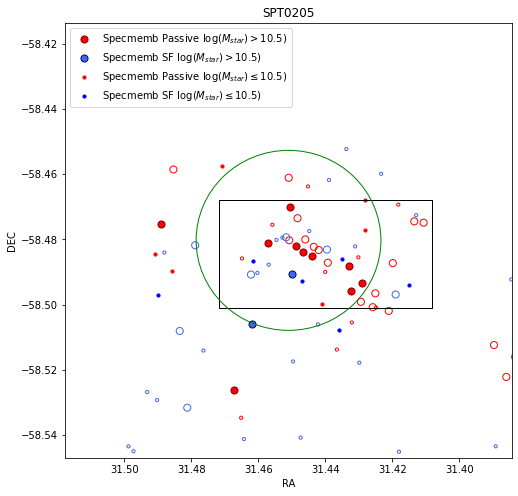

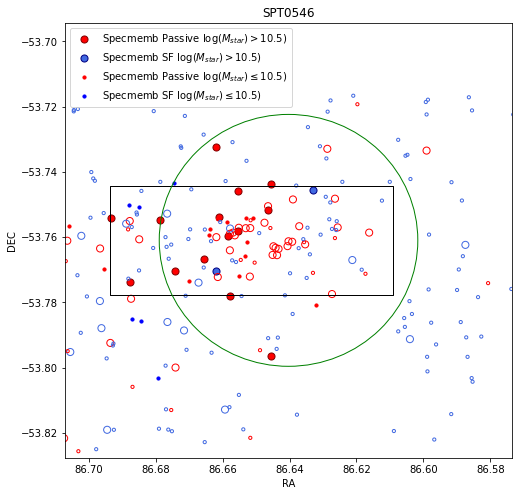

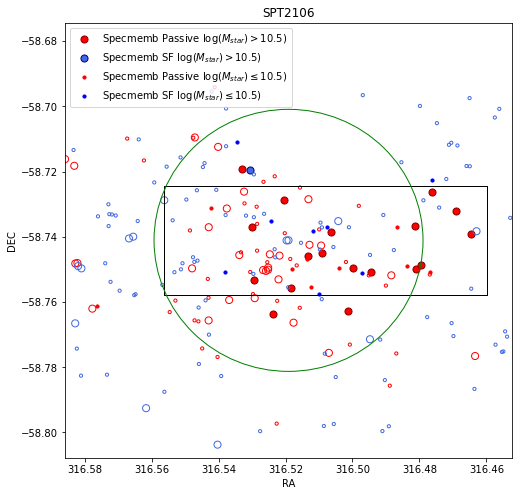

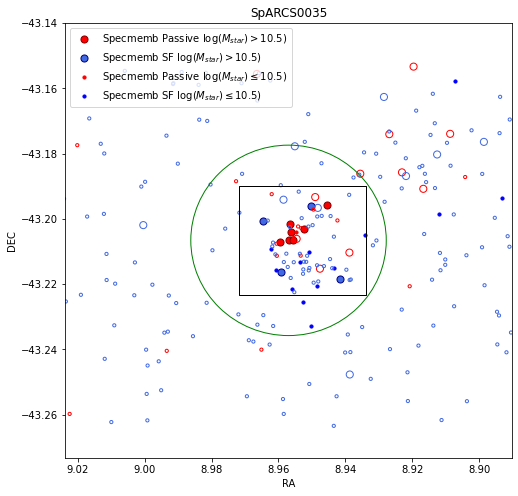

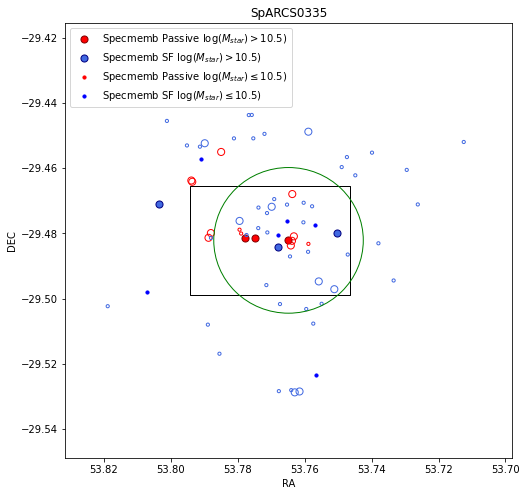

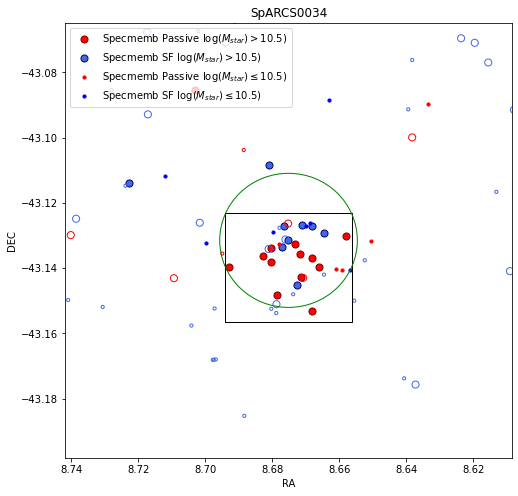

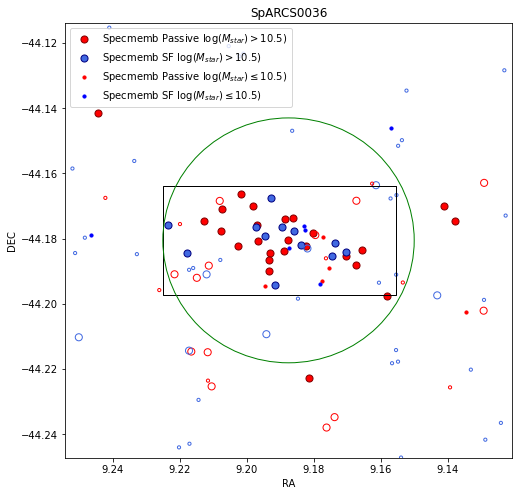

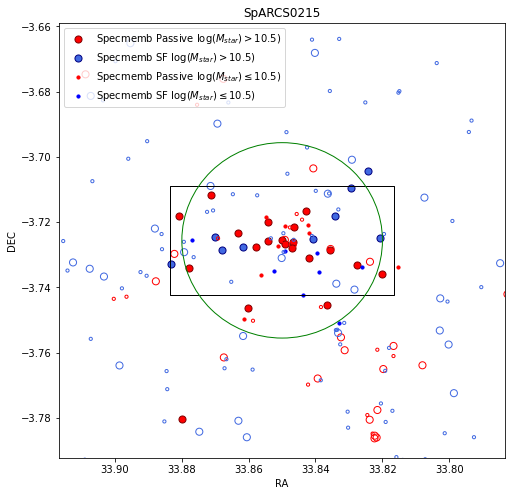

In [12]:
from astropy.cosmology import WMAP9 as cosmo

print(f"{'# Clust'}\t{'NPhigh'}\t{'NSFhigh'}\t{'NPlow'}\t{'NSFlow'}\t{'NPhigh_sp'}\t{'NSFhigh_sp'}\t{'NPlow_sp'}\t{'NSFlow_sp'}\t{'Nmemb'}\t{'Nspec_clust'}\t{'Nphot_clust'}")

#spectroscopic members
specmemb = (zqual>2) & (mem==1)
passhighms = ((mass>10**10.5) & (UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & specmemb
passlowms = ((mass<=10**10.5) & (UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & specmemb
sfhighms = ((mass>10**10.5) & ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec))) & specmemb
sflowms = ((mass<=10**10.5) & ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec))) & specmemb

ntots = 0
ntotp = 0

drasky = np.zeros(len(cluster))
ddecsky = np.zeros(len(cluster))
ramin = np.zeros(len(cluster))
ramax = np.zeros(len(cluster))
decmin = np.zeros(len(cluster))
decmax = np.zeros(len(cluster))
#for ic,clust in enumerate(cluster):
#    if (cluster_id[ic] < 13) | (cluster_id[ic] > 14):

#print('decclust = ',np.array(decclust), 'cos = ',np.cos(np.array(decclust)[2] * np.pi / 180.))
#define limits in RA and DEC.  Account for cos(dec) term in dra
#ddec = 120./3600. + np.zeros(len(cluster))#deg
#print('ramin = ',ramin,' ramax = ',ramax,' decmin = ',decmin,' decmax = ',decmax)

#loop through clusters
for ic,clust in enumerate(cluster):
    #select only clusters in the south
    if (((cluster_id[ic] < 13) | (cluster_id[ic] > 14)) & (decclust[ic] < 10.0) & (clust!='SpARCS0219')):
        #print('decclust[ic] = ',decclust[ic])
        drasky[ic] = dra[clust]/3600./ np.cos(decclust[ic] * np.pi / 180.)   #deg
        ddecsky[ic] = ddec[clust]/3600.   #deg
        ramin[ic] = raclust[ic] + raoff[clust]/3600. - drasky[ic] / 2.0 
        ramax[ic] = raclust[ic] + raoff[clust]/3600. + drasky[ic] / 2.0
        decmin[ic] = decclust[ic] + decoff[clust]/3600. - ddecsky[ic] / 2.0
        decmax[ic] = decclust[ic] + decoff[clust]/3600. + ddecsky[ic] / 2.0
        
        membflag = specmemb & (clustname == clust)
        nmemb = np.count_nonzero(membflag)
        
        infov = (raspec>ramin[ic]) & (raspec<ramax[ic]) & (decspec>decmin[ic]) & (decspec<decmax[ic])
        #spectroscopic members
        cpasshighms = passhighms & (clustname == clust) & infov
        cpasslowms = passlowms & (clustname == clust)& infov
        csfhighms = sfhighms & (clustname == clust)& infov
        csflowms = sflowms & (clustname == clust)& infov
    
        #count different subsamples
        ncpasshighms = np.count_nonzero(cpasshighms)
        ncpasslowms = np.count_nonzero(cpasslowms)
        ncsfhighms = np.count_nonzero(csfhighms)
        ncsflowms = np.count_nonzero(csflowms)
        nspec_clust = ncpasshighms + ncpasslowms + ncsfhighms + ncsflowms
        ntots = ntots + nspec_clust
        
        #photometric members
        infovph = (raphot>ramin[ic]) & (raphot<ramax[ic]) & (decphot>decmin[ic]) & (decphot<decmax[ic])
        #close to cluster redshift, poor quality spectra or no spectra
        zphotmemb = (abs(zphot - zclust[ic])<=0.08) & ((zqualphot <=2) | (specidph<0))
        passhighmp = ((massphot>10**10.5) & (UminV>1.3) & (VminJ<1.6) & (UminV>0.6 + VminJ)) & zphotmemb
        passlowmp = ((massphot<=10**10.5) & (UminV>1.3) & (VminJ<1.6) & (UminV>0.6 + VminJ)) & zphotmemb
        sfhighmp = ((massphot>10**10.5) & ((UminV<=1.3) | (VminJ>=1.6) | (UminV<=0.6 + VminJ))) & zphotmemb
        sflowmp = ((massphot<=10**10.5) & ((UminV<=1.3) | (VminJ>=1.6) | (UminV<=0.6 + VminJ))) & zphotmemb

        cpasshighmp = passhighmp & (clustname_ph == clust) & infovph
        cpasslowmp = passlowmp & (clustname_ph == clust)& infovph
        csfhighmp = sfhighmp & (clustname_ph == clust)& infovph
        csflowmp = sflowmp & (clustname_ph == clust)& infovph
        #count different subsamples
        ncpasshighmp = np.count_nonzero(cpasshighmp)
        ncpasslowmp = np.count_nonzero(cpasslowmp)
        ncsfhighmp = np.count_nonzero(csfhighmp)
        ncsflowmp = np.count_nonzero(csflowmp)
        nphot_clust = ncpasshighmp + ncpasslowmp + ncsfhighmp + ncsflowmp
        ntotp = ntotp + nphot_clust
        
        fig,ax=plt.subplots(1,1,figsize=(8,8))

        pltsel = passhighms & (clustname == clust)
        ax.scatter(raspec[pltsel],decspec[pltsel],c='red',edgecolor = 'maroon',s=50,marker = 'o',label = 'Specmemb Passive log($M_{star})>10.5$)')
        pltsel = sfhighms & (clustname == clust)
        ax.scatter(raspec[pltsel],decspec[pltsel],c='royalblue',edgecolor='navy',s=50,marker = 'o',label = 'Specmemb SF log($M_{star})>10.5$)')

        pltsel = passlowms & (clustname == clust)
        ax.scatter(raspec[pltsel],decspec[pltsel],c='red',s=10,marker = 'o',label = 'Specmemb Passive log($M_{star})\leq10.5$)')
        pltsel = sflowms & (clustname == clust)
        ax.scatter(raspec[pltsel],decspec[pltsel],c='blue',s=10,marker = 'o',label = 'Specmemb SF log($M_{star})\leq10.5$)')

        pltsel = passhighmp & (clustname_ph == clust)
        ax.scatter(raphot[pltsel],decphot[pltsel],c='none',edgecolor = 'red',s=50,marker = 'o')#, label = 'Photmemb Passive log($M_{star})>10.5$)')
        pltsel = sfhighmp & (clustname_ph == clust)
        ax.scatter(raphot[pltsel],decphot[pltsel],c='none',edgecolor='royalblue',s=50,marker = 'o')#,label = 'Photmemb SF log($M_{star})>10.5$)')

        pltsel = passlowmp & (clustname_ph == clust)
        ax.scatter(raphot[pltsel],decphot[pltsel],c='none',edgecolor = 'red',s=10,marker = 'o')#, label = 'Photmemb Passive log($M_{star})\leq10.5$)')
        pltsel = sflowmp & (clustname_ph == clust)
        ax.scatter(raphot[pltsel],decphot[pltsel],c='none',edgecolor='royalblue',s=10,marker = 'o')#,label = 'Photmemb SF log($M_{star})\leq10.5$)')

        #convert to corners that Rectangle needs
        #rafov = 240./3600. / np.cos(decclust[ic] * np.pi / 180.)
        #decfov = 120./3600.
        rectlist = []
        ilab = 0
        #for x, y in zip(racorn, deccorn):
        #rect = Rectangle((ramin[ic],decmin[ic]),rafov,decfov,angle=0.0)
        #rect = Rectangle((raclust[ic] - rafov/2.,decclust[ic] - decfov/2.),rafov,decfov,angle=0.0)
        rect = Rectangle((raclust[ic] + raoff[clust]/3600. - drasky[ic]/2.,\
                          decclust[ic] + decoff[clust]/3600. - ddecsky[ic]/2.),drasky[ic],ddecsky[ic],angle=0.0)

        rectlist.append(rect)
            #ax.text(x - 0.02, y-0.02, str(lab),c='blue')
        
        pc = PatchCollection(rectlist,linewidth=1,edgecolor='k',facecolor='none')
        ax.add_collection(pc)
        
        #compute size of R200 in deg
        rvirdeg = rvirmpc[clust] *(u.mpc / u.deg) / (cosmo.kpc_proper_per_arcmin(zclust[ic]) * u.mpc / (1000.0 *u.kpc) * 60.0 * u.arcmin/u.deg)
        #print(rvirdeg)
        #rvirdeg = rvirmpc[clust] / (cosmo.kpc_proper_per_arcmin(zclust[ic]) * 60.0 / 1000.0)

        circle = plt.Circle((raclust[ic],decclust[ic]),rvirdeg,color='g',fill=False)
        ax.add_patch(circle)
        
        plotsize = 8./60.   #arcmin
        ax.set_xlim(raclust[ic] + plotsize/2, raclust[ic] - plotsize/2)
        if(decclust[ic] > 0):
            ax.set_ylim(decclust[ic] + plotsize/2, decclust[ic] - plotsize/2)
        else: 
            ax.set_ylim(decclust[ic] - plotsize/2, decclust[ic] + plotsize/2)
        ax.set_title(clust)
        ax.set_xlabel("RA")
        ax.set_ylabel("DEC")
        ax.legend(loc=2)
        fig.savefig(clust + 'fov_trim.png')

        print(f"{clust}\t{ncpasshighms + ncpasshighmp}\t{ncsfhighms + ncsfhighmp}\t{ncpasslowms + ncpasslowmp}\t{ncsflowms + ncsflowmp}\t{ncpasshighms}\t{ncsfhighms}\t{ncpasslowms}\t{ncsflowms}\t{nmemb}\t{nspec_clust}\t{nphot_clust}")

        #print(clust)
        #print('Spectroscopic NPhigh =',ncpasshighms,'; NPlow =',ncpasslowms,'; NSFhigh =',ncsfhighms,'; NSFlow =',ncsflowms)
        #print('Photometric NPhigh =',ncpasshighmp,'; NPlow =',ncpasslowmp,'; NSFhigh =',ncsfhighmp,'; NSFlow =',ncsflowmp)
    
print('Ntots =',ntots)
print('Ntotp =',ntotp)

# Clust	NPhigh	NSFhigh	NPlow	NSFlow	NPhigh_sp	NSFhigh_sp	NPlow_sp	NSFlow_sp	Nmemb


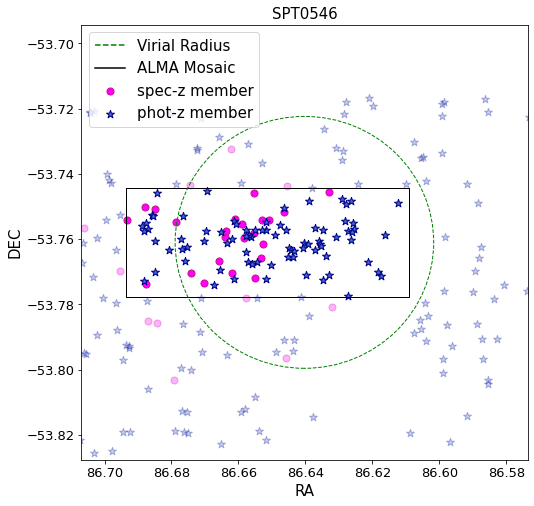

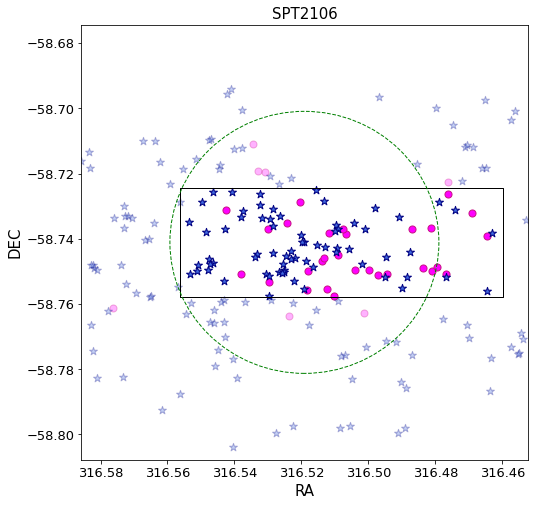

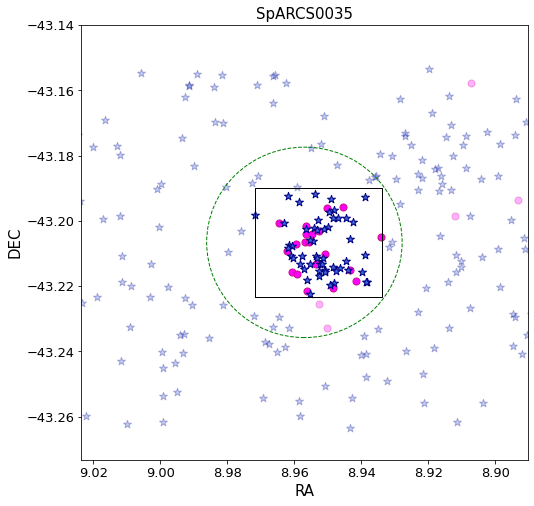

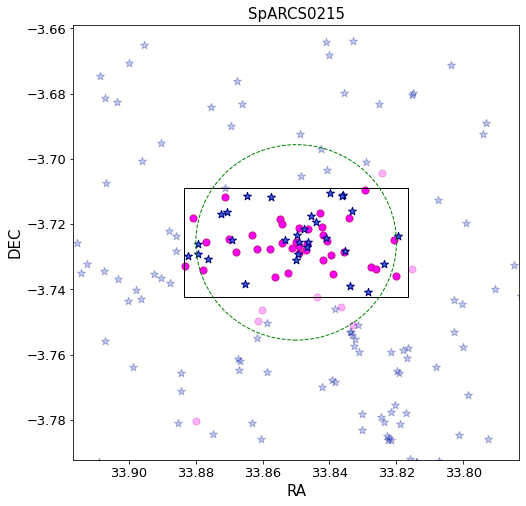

In [13]:
from astropy.cosmology import WMAP9 as cosmo

print(f"{'# Clust'}\t{'NPhigh'}\t{'NSFhigh'}\t{'NPlow'}\t{'NSFlow'}\t{'NPhigh_sp'}\t{'NSFhigh_sp'}\t{'NPlow_sp'}\t{'NSFlow_sp'}\t{'Nmemb'}")

#spectroscopic members
specmemb = (zqual>2) & (mem==1)
good_zs =  specmemb & (lmass_zs>7.0)& (lsfr_zs>-200.0)

drasky = np.zeros(len(cluster))
ddecsky = np.zeros(len(cluster))
ramin = np.zeros(len(cluster))
ramax = np.zeros(len(cluster))
decmin = np.zeros(len(cluster))
decmax = np.zeros(len(cluster))
#for ic,clust in enumerate(cluster):
#    if (cluster_id[ic] < 13) | (cluster_id[ic] > 14):

#print('decclust = ',np.array(decclust), 'cos = ',np.cos(np.array(decclust)[2] * np.pi / 180.))
#define limits in RA and DEC.  Account for cos(dec) term in dra
#ddec = 120./3600. + np.zeros(len(cluster))#deg
#print('ramin = ',ramin,' ramax = ',ramax,' decmin = ',decmin,' decmax = ',decmax)
    
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

#loop through clusters
for ic,clust in enumerate(cluster):
    #select only clusters in the south
    if((clust == 'SPT0546') | (clust=='SPT2106') | (clust == 'SpARCS0035') | (clust == 'SpARCS0215')):
        #print('decclust[ic] = ',decclust[ic])
        drasky[ic] = dra[clust]/3600./ np.cos(decclust[ic] * np.pi / 180.)   #deg
        ddecsky[ic] = ddec[clust]/3600.   #deg
        ramin[ic] = raclust[ic] + raoff[clust]/3600. - drasky[ic] / 2.0 
        ramax[ic] = raclust[ic] + raoff[clust]/3600. + drasky[ic] / 2.0
        decmin[ic] = decclust[ic] + decoff[clust]/3600. - ddecsky[ic] / 2.0
        decmax[ic] = decclust[ic] + decoff[clust]/3600. + ddecsky[ic] / 2.0
        
        infov = (raspec>ramin[ic]) & (raspec<ramax[ic]) & (decspec>decmin[ic]) & (decspec<decmax[ic])
  
        membflag = specmemb & (clustname == clust)

        nmemb = np.count_nonzero(membflag)
        
        #spectroscopic members
        c_zs = good_zs & (clustname == clust)
        c_zsinfov = c_zs & infov
        c_zsoutfov = c_zs & ~infov

        
        #photometric members
        #close to cluster redshift, poor quality spectra or no spectra
        infovph = (raphot>ramin[ic]) & (raphot<ramax[ic]) & (decphot>decmin[ic]) & (decphot<decmax[ic])
        zphotmemb = (abs(zphot - zclust[ic])<=0.08) & ((zqualphot <=2) | (specidph<0))
        good_zp = zphotmemb & (lmass_zp>7.0) & (lsfr_zp>-200.0)

        c_zp = good_zp & (clustname_ph == clust)
        c_zpinfov = c_zp & infovph
        c_zpoutfov = c_zp & ~infovph

       
        fig,ax=plt.subplots(1,1,figsize=(8,8))

        labstr_zs = ''
        labstr_zp = ''
        if(clust == 'SPT0546'):
            labstr_zs = 'spec-z member'
            labstr_zp = 'phot-z member'
            labstr_trans = 'transition galaxy'
            ax.plot([0.0],[0.0],'g--',label='Virial Radius')
            ax.plot([0.0],[0.0],'k-',label='ALMA Mosaic')


        ax.scatter(raspec[c_zsinfov],decspec[c_zsinfov],c='magenta',edgecolor = 'mediumvioletred',s=50,marker = 'o',label = labstr_zs)
        ax.scatter(raphot[c_zpinfov],decphot[c_zpinfov],c='royalblue',edgecolor = 'navy',s=70,marker = '*',label = labstr_zp)

        ax.scatter(raspec[c_zsoutfov],decspec[c_zsoutfov],c='magenta',edgecolor = 'mediumvioletred',s=50,marker = 'o', alpha = 0.3)
        ax.scatter(raphot[c_zpoutfov],decphot[c_zpoutfov],c='royalblue',edgecolor = 'navy',s=70,marker = '*', alpha = 0.3)

        #convert to corners that Rectangle needs
        #rafov = 240./3600. / np.cos(decclust[ic] * np.pi / 180.)
        #decfov = 120./3600.
        rectlist = []
        ilab = 0
        #for x, y in zip(racorn, deccorn):
        #rect = Rectangle((ramin[ic],decmin[ic]),rafov,decfov,angle=0.0)
        #rect = Rectangle((raclust[ic] - rafov/2.,decclust[ic] - decfov/2.),rafov,decfov,angle=0.0)
        rect = Rectangle((raclust[ic] + raoff[clust]/3600. - drasky[ic]/2.,\
                          decclust[ic] + decoff[clust]/3600. - ddecsky[ic]/2.),drasky[ic],ddecsky[ic],angle=0.0)

        rectlist.append(rect)
            #ax.text(x - 0.02, y-0.02, str(lab),c='blue')
        
        pc = PatchCollection(rectlist,linewidth=1,edgecolor='k',facecolor='none')
        ax.add_collection(pc)
        #plt.text(raclust[ic] + raoff[clust]/3600.,decclust[ic] + decoff[clust]/3600. + ddecsky[ic]/2*1.05,s='ALMA Mosaic',color='k',fontsize=20)

        
        #compute size of R200 in deg
        rvirdeg = rvirmpc[clust] *(u.mpc / u.deg) / (cosmo.kpc_proper_per_arcmin(zclust[ic]) * u.mpc / (1000.0 *u.kpc) * 60.0 * u.arcmin/u.deg)
        #print(rvirdeg)
        #rvirdeg = rvirmpc[clust] / (cosmo.kpc_proper_per_arcmin(zclust[ic]) * 60.0 / 1000.0)

        circle = plt.Circle((raclust[ic],decclust[ic]),rvirdeg,color='g',linestyle='--', fill=False)

        ax.add_patch(circle)
        #plt.text(raclust[ic],decclust[ic]+rvirdeg+0.05*rvirdeg,s='$R_{vir}$',color='g',fontsize=20)

        plotsize = 8./60.   #arcmin
        ax.set_xlim(raclust[ic] + plotsize/2, raclust[ic] - plotsize/2)
        if(decclust[ic] > 0):
            ax.set_ylim(decclust[ic] + plotsize/2, decclust[ic] - plotsize/2)
        else: 
            ax.set_ylim(decclust[ic] - plotsize/2, decclust[ic] + plotsize/2)
        ax.set_title(clust,fontsize=15)
        #ax.text(raclust[ic] + plotsize/2, raclust[ic] - plotsize/2,fontsize=15)
        ax.set_xlabel("RA",fontsize=15)
        ax.set_ylabel("DEC",fontsize=15)
        if(clust == 'SPT0546'):
            ax.legend(loc=2,fontsize=15)
            
        ax.tick_params(axis='both', which='major', labelsize=13)

        fig.savefig(clust + 'fov_trim.v1.png',dpi=150)

        #print(f"{clust}\t{ncpasshighms + ncpasshighmp}\t{ncsfhighms + ncsfhighmp}\t{ncpasslowms + ncpasslowmp}\t{ncsflowms + ncsflowmp}\t{ncpasshighms}\t{ncsfhighms}\t{ncpasslowms}\t{ncsflowms}\t{nmemb}")

        #print(clust)
        #print('Spectroscopic NPhigh =',ncpasshighms,'; NPlow =',ncpasslowms,'; NSFhigh =',ncsfhighms,'; NSFlow =',ncsflowms)
        #print('Photometric NPhigh =',ncpasshighmp,'; NPlow =',ncpasslowmp,'; NSFhigh =',ncsfhighmp,'; NSFlow =',ncsflowmp)


### Make plots of SFR-Mstar

NameError: name 'lmstar_speagle' is not defined

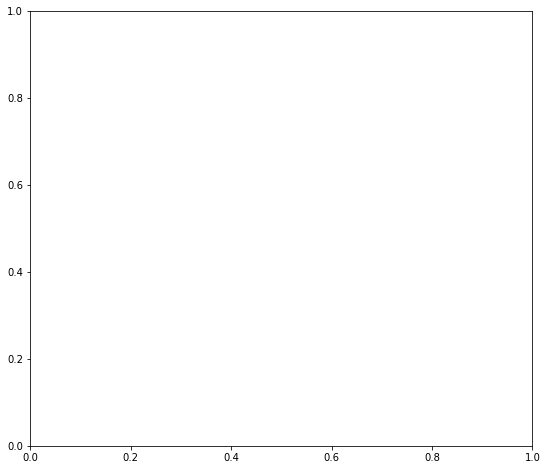

In [14]:
### from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import distance
import sfr_mstar_lit as sml
import comparison_functions as comp
import importlib
importlib.reload(sml)
importlib.reload(comp)
from astropy.cosmology import WMAP9 as cosmo
from astropy.table import QTable, Table, Column

#spectroscopic members
specmemb = (zqual>2) & (mem==1)
pass_zs = ((UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & specmemb & (lmass_zs>7.0)& (lsfr_zs>-200.0)
sf_zs = ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec)) & specmemb & (lmass_zs>7.0)& (lsfr_zs>-200.0)

drasky = np.zeros(len(cluster))
ddecsky = np.zeros(len(cluster))
ramin = np.zeros(len(cluster))
ramax = np.zeros(len(cluster))
decmin = np.zeros(len(cluster))
decmax = np.zeros(len(cluster))
#for ic,clust in enumerate(cluster):
#    if (cluster_id[ic] < 13) | (cluster_id[ic] > 14):

#print('decclust = ',np.array(decclust), 'cos = ',np.cos(np.array(decclust)[2] * np.pi / 180.))
#define limits in RA and DEC.  Account for cos(dec) term in dra
#ddec = 120./3600. + np.zeros(len(cluster))#deg
#print('ramin = ',ramin,' ramax = ',ramax,' decmin = ',decmin,' decmax = ',decmax)

prop_sfrsamp = np.array([])
prop_mstarsamp = np.array([])

#estimate stellar mass dependence of SFR at which gas mass is equal to fgas=0.3 at log(Mstar)=10.5
fgas = 0.3
mgas_mstar_fix = fgas / (1.-fgas)
lmgas = 10.5 + np.log10(mgas_mstar_fix)

# #I think that beta=2 is more appropriate for the redshift evolution in the slope
# #assume Whitaker+14 main-sequence
# beta_str = '2'
# if(beta_str == '2'):
#     #for Beta=2.0 case
#     Amu = 0.16
#     beta = 2.0
#     Bmu = -3.69
#     Fmu = 0.65
#     Cmu = 0.52
#     Dmu = -0.36

# if(beta_str == '0'):
#     #for Beta=0.0 case
#     Amu = -1.25
#     beta = 0.0
#     Bmu = 2.6
#     Fmu = 0.0
#     Cmu = 0.53
#     Dmu = -0.36

#I think that beta=2 is more appropriate for the redshift evolution in the slope
#assume Speagle+14 main-sequence
beta_str = '2'
if(beta_str == '2'):
    #for Beta=2.0 case
    Amu = 0.12
    beta = 2.0
    Bmu = -3.62
    Fmu = 0.66
    Cmu = 0.53
    Dmu = -0.35

if(beta_str == '0'):
    #for Beta=0.0 case
    Amu = -1.19
    beta = 0.0
    Bmu = 2.49
    Fmu = 0.0
    Cmu = 0.52
    Dmu = -0.36

ntots = 0
ntotp = 0
ntot_pass = 0
ntot_sf = 0
ntots_sf = 0
ntotp_sf = 0
ntot_trans = 0
ntots_trans = 0
ntots_pass = 0
ntotp_pass = 0
ntot_det = 0
ntots_det = 0
ntotp_det = 0

#initialize arrays that I will build to output as a file that can be used to plot phase-space positions
galdist_r200_zssamp = np.array([])
dlsfr_speagle_zssamp = np.array([])
vspec_sig_zssamp = np.array([])
lowsfr_outflag = np.array((VminJspec*0),dtype=bool)
transsfr_outflag = np.array((VminJspec*0),dtype=bool)
normsfr_outflag = np.array((VminJspec*0),dtype=bool)
lmass_test = np.array([])
lsfr_test = np.array([])

#compute relative SFR of every galaxy w.r.t. Speagle+14 MS
#compute SFR for Speagle+14 MS at redshift of each galaxy
cosmop = {'omega_M_0' : 0.3, 'omega_lambda_0' : 0.7, 'h' : 0.7}  #h=H_0/100
t, err_f, err_t = distance.age(zspec, **cosmop)
speagle_tc = t/(3600.*24.*365.25*1.e9)
#what is the SFR of the Speagle MS at this redshift and stellar mass
lsfr_speagle_exp = (0.84 - 0.026 * speagle_tc) * (lmass_zs) - (6.51 - 0.11 * speagle_tc) #Msol/year. eq. 28
#the difference in log(SFR) between the galaxy and Speagle+14
dlsfr_speagle = lsfr_speagle_exp - lsfr_zs

fig,ax=plt.subplots(1,1,figsize=(9,8))

#limits of the transition region w.r.t. Speagle+14 MS
trans_low_dlsfr = 1.1
trans_high_dlsfr = 0.5
ax.fill_between(lmstar_speagle,lsfr_speagle-trans_high_dlsfr,lsfr_speagle-trans_low_dlsfr, color='khaki', alpha=0.9)
#pspeagle, = ax.plot(lmstar_whit,lsfr_speagle-0.6,'m-', label = 'Speagle+2014')

#loop through clusters
for ic,clust in enumerate(cluster):
    #select only clusters in final sample
    if((clust == 'SPT0546') | (clust=='SPT2106') | (clust == 'SpARCS0035') | (clust == 'SpARCS0215')):
        print(clust)
        #print('decclust[ic] = ',decclust[ic])
        drasky[ic] = dra[clust]/3600./ np.cos(decclust[ic] * np.pi / 180.)   #deg
        ddecsky[ic] = ddec[clust]/3600.   #deg
        ramin[ic] = raclust[ic] + raoff[clust]/3600. - drasky[ic] / 2.0 
        ramax[ic] = raclust[ic] + raoff[clust]/3600. + drasky[ic] / 2.0
        decmin[ic] = decclust[ic] + decoff[clust]/3600. - ddecsky[ic] / 2.0
        decmax[ic] = decclust[ic] + decoff[clust]/3600. + ddecsky[ic] / 2.0
        
        membflag = specmemb & (clustname == clust)
        nmemb = np.count_nonzero(membflag)
        
        infov = (raspec>ramin[ic]) & (raspec<ramax[ic]) & (decspec>decmin[ic]) & (decspec<decmax[ic])
        #spectroscopic members
        cpass_zs = pass_zs & (clustname == clust) & infov
        csf_zs = sf_zs & (clustname == clust)& infov    
        ncpass_zs = np.count_nonzero(cpass_zs)
        ncsf_zs = np.count_nonzero(csf_zs)
        ntots = ntots + ncpass_zs + ncsf_zs
        
        #photometric members
        infovph = (raphot>ramin[ic]) & (raphot<ramax[ic]) & (decphot>decmin[ic]) & (decphot<decmax[ic])
        #close to cluster redshift, poor quality spectra or no spectra
        zphotmemb = (abs(zphot - zclust[ic])<=0.08) & ((zqualphot <=2) | (specidph<0))
        pass_zp = ((UminV>1.3) & (VminJ<1.6) & (UminV>0.6 + VminJ)) & zphotmemb &(lmass_zp>7.0) & (lsfr_zp>-200.0)
        sf_zp = ((UminV<=1.3) | (VminJ>=1.6) | (UminV<=0.6 + VminJ)) & zphotmemb & (lmass_zp>7.0) & (lsfr_zp>-200.0)

        #compute number of galaxies we expect to detect
        lsfr_whit_zp = 0.38 + 1.14 * zclust[ic] - 0.19 * zclust[ic]**2 + (0.7 -0.13 * zclust[ic]) * (lmass_zp - 10.5)
        lssfr_whit_zp = lsfr_whit_zp - lmass_zp
        lSFRlim_zp = lmass_zp + lssfr_whit_zp + (np.log10(mgas_mstar_fix) - Amu - \
                                      Bmu * (np.log10(1+zclust[ic]) - Fmu)**beta - Dmu*(lmass_zp - 10.7)) / Cmu
        detflag_zp = zphotmemb & (lmass_zp>7.0) & (lsfr_zp>lSFRlim_zp) & infovph & (clustname_ph == clust)

        lsfr_whit_zs = 0.38 + 1.14 * zclust[ic] - 0.19 * zclust[ic]**2 + (0.7 -0.13 * zclust[ic]) * (lmass_zs - 10.5)
        lssfr_whit_zs = lsfr_whit_zs - lmass_zs
        lSFRlim_zs = lmass_zs + lssfr_whit_zs + (np.log10(mgas_mstar_fix) - Amu - \
                                      Bmu * (np.log10(1+zclust[ic]) - Fmu)**beta - Dmu*(lmass_zs - 10.7)) / Cmu
        detflag_zs = membflag & (lmass_zs>7.0) & (lsfr_zs>lSFRlim_zs) & infov & (clustname == clust)
        ntot_det = ntot_det + np.count_nonzero(detflag_zp) + np.count_nonzero(detflag_zs)
        ntotp_det = ntotp_det + np.count_nonzero(detflag_zp)
        ntots_det = ntots_det + np.count_nonzero(detflag_zs)
        
        cpass_zp = pass_zp & (clustname_ph == clust) & infovph
        csf_zp = sf_zp & (clustname_ph == clust)& infovph
        ncpass_zp = np.count_nonzero(cpass_zp)
        ncsf_zp = np.count_nonzero(csf_zp)
        ntotp = ntotp + ncpass_zp + ncsf_zp
        ntot_pass = ntot_pass + ncpass_zs + ncpass_zp
        ntots_pass = ntots_pass + ncpass_zs
        ntotp_pass = ntotp_pass + ncpass_zp

        ntot_sf = ntot_sf + ncsf_zs + ncsf_zp
        ntots_sf = ntots_sf + ncsf_zs
        ntotp_sf = ntot_sf + ncsf_zp
        
        #print(lsfr_zp[cpass_zp])
        
        labstr_zs = ''
        labstr_zp = ''
        if(clust == 'SPT0546'):
            labstr_zs = 'spec-z member'
            labstr_zp = 'phot-z member'
            labstr_trans = 'transition galaxy'
            labstr_all = 'member'

        #select low and normal SFR galaxies
        slope = (-0.3 + 1.) / (10.25 - 9.5)
        lowsfr_zp = (lsfr_zp + 0.35 < (-1 + slope * (lmass_zp - 9.5)))
        lowsfr_zs = (lsfr_zs + 0.35 < (-1 + slope * (lmass_zs - 9.5)))
        lowsfrflag_zpmemb = lowsfr_zp & zphotmemb &  (clustname_ph == clust)& infovph
        normsfrflag_zpmemb = ~lowsfr_zp & zphotmemb & (clustname_ph == clust)& infovph
        lowsfrflag_zsmemb = lowsfr_zs & specmemb & (clustname == clust)& infov
        normsfrflag_zsmemb = ~lowsfr_zs & specmemb & (clustname == clust)& infov
        zsmemb = specmemb & (clustname == clust)& infov
        zpmemb = zphotmemb & (clustname_ph == clust)& infovph

        #select transition galaxies with (V-J)+0.4< (U-V) < (V-J)+0.65 with normal and low SFR
        transnormsfrflag_zp = ((UminV < VminJ + 0.65) & (UminV > VminJ + 0.4)) & zphotmemb & (clustname_ph == clust)& infovph & ~lowsfr_zp
        translowsfrflag_zp = ((UminV < VminJ + 0.65) & (UminV > VminJ + 0.4)) & zphotmemb & (clustname_ph == clust)& infovph & lowsfr_zp
        transflag_zp = ((UminV < VminJ + 0.65) & (UminV > VminJ + 0.4)) & zphotmemb & (clustname_ph == clust)& infovph
        
        transnormsfrflag_zs = ((UminVspec < VminJspec + 0.65) & (UminVspec > VminJspec + 0.4)) & membflag & infov & ~lowsfr_zs
        translowsfrflag_zs = ((UminVspec < VminJspec + 0.65) & (UminVspec > VminJspec + 0.4)) & membflag & infov & lowsfr_zs
        transflag_zs = ((UminVspec < VminJspec + 0.65) & (UminVspec > VminJspec + 0.4)) & membflag & infov
        ntot_trans = ntot_trans + np.count_nonzero(transflag_zp) + np.count_nonzero(transflag_zs)
        ntots_trans = ntots_trans + np.count_nonzero(transflag_zs)
               
        #select SF, trans, and pass galaxies based on SFR
        normsfr_zsout = (dlsfr_speagle<trans_high_dlsfr) & specmemb & (clustname == clust)& infov
        transsfr_zsout = (dlsfr_speagle<trans_low_dlsfr) & (dlsfr_speagle >= trans_high_dlsfr) & specmemb & (clustname == clust)& infov
        lowsfr_zsout = (dlsfr_speagle>=trans_low_dlsfr) & specmemb & (clustname == clust)& infov

        #correction factor to put our sSFRs into agreement with published relations
        lSFR_offset = 0.35
        #normal SFR
        #ax.scatter(lmass_zs[normsfrflag_zsmemb],lsfr_zs[normsfrflag_zsmemb] + lSFR_offset,c='magenta',edgecolor = 'mediumvioletred',s=50,marker = 'o',label = labstr_zs)
        ax.scatter(lmass_zs[normsfrflag_zsmemb],lsfr_zs[normsfrflag_zsmemb] + lSFR_offset,c='limegreen',edgecolor = 'darkgreen',s=150,marker = '*',label = labstr_zs)
        ax.scatter(lmass_zp[normsfrflag_zpmemb],lsfr_zp[normsfrflag_zpmemb] + lSFR_offset,c='limegreen',edgecolor = 'darkgreen',s=150,marker = '*',label = labstr_zp)
        
        #transition galaxies
        #ax.scatter(lmass_zs[transnormsfrflag_zs],lsfr_zs[transnormsfrflag_zs] + lSFR_offset,c='limegreen',edgecolor = 'green',s=60,marker = 'o')
        #ax.scatter(lmass_zp[transnormsfrflag_zp],lsfr_zp[transnormsfrflag_zp] + lSFR_offset,c='limegreen',edgecolor = 'green',s=60,marker = '*')
        ax.scatter(lmass_zs[transnormsfrflag_zs],lsfr_zs[transnormsfrflag_zs] + lSFR_offset,c='limegreen',edgecolor = 'darkgreen',s=150,marker = '*')
        ax.scatter(lmass_zp[transnormsfrflag_zp],lsfr_zp[transnormsfrflag_zp] + lSFR_offset,c='limegreen',edgecolor = 'darkgreen',s=150,marker = '*')

        #limits
        ax.errorbar(lmass_zp[lowsfrflag_zpmemb],lsfr_zp[lowsfrflag_zpmemb] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='darkgreen')
        #ax.errorbar(lmass_zs[lowsfrflag_zsmemb],lsfr_zs[lowsfrflag_zsmemb] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='mediumvioletred')
        #ax.errorbar(lmass_zs[translowsfrflag_zs],lsfr_zs[translowsfrflag_zs] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='limegreen')
        #ax.errorbar(lmass_zp[translowsfrflag_zp],lsfr_zp[translowsfrflag_zp] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='limegreen')
        ax.errorbar(lmass_zs[lowsfrflag_zsmemb],lsfr_zs[lowsfrflag_zsmemb] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='darkgreen')
        ax.errorbar(lmass_zs[translowsfrflag_zs],lsfr_zs[translowsfrflag_zs] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='darkgreen')
        ax.errorbar(lmass_zp[translowsfrflag_zp],lsfr_zp[translowsfrflag_zp] + lSFR_offset,yerr = 0.2, uplims=True, ls='',ecolor='darkgreen')
        
        
        #######DO NOT USE!!!!!! There is potentially a problem here in how I combine SFR classes and other info.  
#         #not being used at the moment.  Will be used if I try to output Phase-space positions of different subsamples
#         #build array of phase space coordinates of galaxies
#         #compute size of R200 in deg
#         rvirdeg = rvirmpc[clust] *(u.mpc / u.deg) / (cosmo.kpc_proper_per_arcmin(zclust[ic]) * u.mpc / (1000.0 *u.kpc) * 60.0 * u.arcmin/u.deg)
#         #find Rproj/R200.  This does the wrong thing for all clusters but one, but then we will only use the values for that cluster
#         #galdist_deg is computed in an earlier cell
#         galdist_r200 = np.array(galdist_deg / rvirdeg)
#         galdist_r200_zssamp = np.append(galdist_r200_zssamp,galdist_r200[zsmemb])  #only values for current cluster
#         dlsfr_speagle_zssamp = np.append(dlsfr_speagle_zssamp,dlsfr_speagle[zsmemb])
#         vspec_sig_zssamp = np.append(vspec_sig_zssamp,vpec_sig_zs[zsmemb])
#         lowsfr_outflag = lowsfr_outflag | cpass_zs
#         normsfr_outflag = normsfr_outflag | csf_zs
#         transsfr_outflag = transsfr_outflag | transflag_zs
#         #lowsfr_outflag = lowsfr_outflag | lowsfr_zsout
#         #normsfr_outflag = normsfr_outflag | normsfr_zsout
#         #transsfr_outflag = transsfr_outflag | transsfr_zsout
#         print(np.count_nonzero(csf_zs))
        
        
# print('low = ', np.count_nonzero(lowsfr_outflag))
# print('trans = ', np.count_nonzero(transsfr_outflag))
# print('norm = ', np.count_nonzero(normsfr_outflag))
# print('lengths =', len(vspec_sig_zssamp),len(lowsfr_outflag))
#counter = np.arange(np.count_nonzero)
#t = Table([galdist_r200_zssamp])

#here there is no comma after p1, because it returns a pathcollection (https://stackoverflow.com/questions/39984509/typeerror-pathcollection-object-is-not-iterable-when-adding-second-legend-to)
p1 = ax.scatter([0.0],[0.0],c='limegreen',edgecolor = 'green',s=120,marker = 'o')
p2 = ax.scatter([0.0],[0.0],c='limegreen',edgecolor = 'green',s=120,marker = '*')
pspecmemb = ax.scatter([0.0],[0.0],c='magenta',edgecolor = 'mediumvioletred',s=50,marker = 'o',label = labstr_zs)
pphotmemb = ax.scatter([0.0],[0.0],c='royalblue',edgecolor = 'navy',s=70,marker = '*',label = labstr_zp)
pmemb = ax.scatter([0.0],[0.0],c='limegreen',edgecolor = 'darkgreen',s=150,marker = '*',label = labstr_all)
pdetlim, = ax.plot([0.0],[0.0],'g--')
#pup1 = ax.errorbar([0.0],[0.0],yerr=0.2,uplims=True, ls='',ecolor='royalblue')
#pup2 = ax.errorbar([0.0],[0.0],yerr=0.2,uplims=True, ls='',ecolor='mediumvioletred')
#pup3 = ax.errorbar([0.0],[0.0],yerr=0.2,uplims=True, ls='',ecolor='limegreen')

#print(lmass_zs[normsfr_outflag],lsfr_zs[normsfr_outflag])
#ax.scatter(lmass_zs[normsfr_outflag],lsfr_zs[normsfr_outflag],color='magenta',s=120, marker="^")

#print totals
print("total number of zspec = ", ntots)
print("total number of zphot = ", ntotp)
print("total number of sources = ", ntots + ntotp)
print("total number of passive galaxies = ", ntot_pass)
print("total number of passive galaxies spec-members = ", ntots_pass)
print("total number of passive galaxies phot-members = ", ntotp_pass)
print("total number of SF galaxies = ", ntot_sf)
print("total number of SF galaxies spec-members = ", ntots_sf)
print("total number of SF galaxies phot-members = ", ntotp_sf)
print("total number of transition galaxies = ", ntot_trans)
print("total number of transition galaxies spec-members = ", ntots_trans)
print("total number of detections = ", ntot_det)
print("total number of spec detections = ", ntots_det)
print("total number of phot detections = ", ntotp_det)

#total number of SF detections including interloper fraction
#fraction of SF zphot members that are interlopers (from cell later one)
finterlop_sf = 0.43
finterlop_p = 0.15
ntotp_det_real = (1-finterlop_sf) * ntotp_det
print("real number of phot detections = ", ntotp_det_real)

#total number of sources
ntot_targ_real = ntots_pass + (1-finterlop_p) * ntotp_pass + ntots_sf + (1 - finterlop_sf) * ntotp_sf
print("total number of cluster member targets = ", ntot_targ_real)

#total number of real passive members
ntot_pass_real = ntots_pass + (1-finterlop_p) * ntotp_pass
print("total number of passive cluster member targets = ", ntot_pass_real)

#total number of real SF members
ntot_sf_real = ntots_sf + (1-finterlop_sf) * ntotp_sf
print("total number of SF cluster member targets = ", ntot_sf_real)

ax.set_xlim(8.5,11.5)
ax.set_ylim(-2.5,3.2)
#plot whitaker MS line
#zMS = 1.13
#lmstar_whit = np.arange(7.0,12.0,0.2)
#lsfr_whit = 0.38 + 1.14 * zMS - 0.19 * zMS**2 + (0.7 -0.13 * zMS) * (lmstar_whit - 10.5)
#lssfr_whit = lsfr_whit - lmstar_whit
#here there is a comma after pwhit, because it returns a tuple
#ax.plot(lmstar_whit, lsfr_whit,'w-',linewidth=4,label = 'Whitaker+2012')
#pwhit, = ax.plot(lmstar_whit, lsfr_whit,'r-',label = 'Whitaker+2012')

lmstar_schr = lmstar_whit - 9.0
r_schr = np.log10(1+zMS)
lsfr_schr = lmstar_schr - 0.5 + 1.5 * r_schr - 0.3 * (np.maximum(0,lmstar_schr - 0.36 - 2.5 * r_schr))**2
#ax.plot(lmstar_whit,lsfr_schr,'w-', linewidth=4,label = 'Schreiber+2015')
#pschreib, = ax.plot(lmstar_whit,lsfr_schr,'m-', label = 'Schreiber+2015')

#Plot Speagle+14 MS
#define Speagle+14 MS
#speagle_z = np.arange(0,2,0.01)
zMS = 1.13
lmstar_speagle = np.arange(7.0,12.0,0.2)
cosmop = {'omega_M_0' : 0.3, 'omega_lambda_0' : 0.7, 'h' : 0.7}  #h=H_0/100
t, err_f, err_t = distance.age(zMS, **cosmop)
speagle_tc = t/(3600.*24.*365.25*1.e9)
#speagle_tc = 1.143 - 1.026 * np.log10(1.+zMS) - 0.599 * (np.log10(1.+zMS))**2 + 0.528 * (np.log10(1.+zMS))**3
#lssfr_speagle = (-0.16 - 0.026 * speagle_tc) * (lmstar_speagle + 0.025) - (6.51 - 0.11 * speagle_tc)  + 9. #Gyr^-1
lsfr_speagle = (0.84 - 0.026 * speagle_tc) * (lmstar_speagle) - (6.51 - 0.11 * speagle_tc) #Msol/year. eq. 28
lssfr_speagle = lsfr_speagle - lmstar_speagle
#lsfr_speagle = lssfr_speagle + lmstar_speagle - 9.
ax.plot(lmstar_speagle,lsfr_speagle,'w-', linewidth=4)
pspeagle, = ax.plot(lmstar_speagle,lsfr_speagle,'k-', label = 'Speagle+2014')

                             
slope = (-0.3 + 1.) / (10.25 - 9.5)
ylowsfr = -1. + slope * (lmstar_speagle - 9.5)
#ax.plot(lmstar_whit,ylowsfr,'k--')
                             

# stellar mass dependence of SFR at which gas mass is equal to fgas=0.3 at log(Mstar)=10.5.  Assume Whitaker+14 MS
# lSFRlim = lmstar_whit + lssfr_whit + (np.log10(mgas_mstar_fix) - Amu - \
#                                       Bmu * (np.log10(1+zMS) - Fmu)**beta - Dmu*(lmstar_whit - 10.7)) / Cmu
# ax.plot(lmstar_whit, lSFRlim, 'w--', linewidth=4.0)
# ax.plot(lmstar_whit, lSFRlim, 'g--',label= '5-$\sigma$ detection limit')

# stellar mass dependence of SFR at which gas mass is equal to fgas=0.3 at log(Mstar)=10.5.  Assume Speagle+14 MS
#lSFRlim = lmstar_speagle + lssfr_speagle + (np.log10(mgas_mstar_fix) - Amu - \
#                                      Bmu * (np.log10(1+zMS) - Fmu)**beta - Dmu*(lmstar_speagle - 10.7)) / Cmu
#ax.plot(lmstar_speagle, lSFRlim, 'w--', linewidth=4.0)
#ax.plot(lmstar_speagle, lSFRlim, 'g--',label= '5-$\sigma$ detection limit')

#playing around with a custom legend to show the transition region.  Didn't work easily
#import matplotlib.patches as mpatches
#transition = mpatches.Patch(color='limegreen', label='transition region')
                             
    
#plot literature values
sc1 = sml.plotSFR_MStar_lit(ax)


#ax.set_title(clust)
ax.set_xlabel(r"log(M$_{\rm stellar}$)",fontsize=20)
ax.set_ylabel("log(SFR)",fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

#ax.legend(loc=2)
#l = ax.legend([pspecmemb,pphotmemb,(p1, p2),pwhit,pschreib,pdetlim], \
#              ['spec-z member','phot-z member', 'transition galaxy', 'Whitaker+2012', 'Schreiber+2016','5-$\sigma$ CO detection limit'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)},loc=2,fontsize=10)
l = ax.legend([pmemb,sc1, pspeagle], \
              ['member - This proposal', r'literature cluster CO $1<z<2$','Speagle+14 SFR Main sequence'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)},loc=2,fontsize=14)
#l = ax.legend([pspecmemb,pphotmemb,(p1, p2),pwhit,pschreib,pdetlim,(pup1,pup2,pup3)], \
#              ['spec-z member','phot-z member', 'transition galaxy', 'Whitaker+2012', 'Schreiber+2014','5-$\sigma$ CO detection limit', 'quiescent stacking candidates'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)},loc=2,fontsize=10)
fig.savefig('sfr_mstar.png',dpi=200)


# make UVJ plot

In [ ]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

#spectroscopic members
specmemb = (zqual>2) & (mem==1)
good_zs =  specmemb & (lmass_zs>7.0)& (lsfr_zs>-200.0)


drasky = np.zeros(len(cluster))
ddecsky = np.zeros(len(cluster))
ramin = np.zeros(len(cluster))
ramax = np.zeros(len(cluster))
decmin = np.zeros(len(cluster))
decmax = np.zeros(len(cluster))
#for ic,clust in enumerate(cluster):
#    if (cluster_id[ic] < 13) | (cluster_id[ic] > 14):

#print('decclust = ',np.array(decclust), 'cos = ',np.cos(np.array(decclust)[2] * np.pi / 180.))
#define limits in RA and DEC.  Account for cos(dec) term in dra
#ddec = 120./3600. + np.zeros(len(cluster))#deg
#print('ramin = ',ramin,' ramax = ',ramax,' decmin = ',decmin,' decmax = ',decmax)

prop_sfrsamp = np.array([])
prop_mstarsamp = np.array([])

ntots = 0
ntotp = 0

fig,ax=plt.subplots(1,1,figsize=(8,8))

UminVplmin = 0.20
UminVplmax = 2.25
VminJplmin = 0.0
VminJplmax = 1.8
ax.set_xlim(VminJplmin, VminJplmax)
ax.set_ylim(UminVplmin,UminVplmax)


# Show in greyscale all galaxies with stellar mass between 9.0 and 12, and photo-z between 0.8 and 1.5
zphotsamp = (zphot>0.8) & (zphot<1.5) &(lmass_zp>9.5) & (lmass_zp < 12.0) 
        
Nbins = 50
bin_range = [[VminJplmin,VminJplmax],[UminVplmin,UminVplmax]]
N,xedges,yedges = np.histogram2d( VminJ[zphotsamp], UminV[zphotsamp], bins=Nbins, range=bin_range)
N = N.T
xcenters = (xedges[:-1] + xedges[1:]) / 2
ycenters = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(xedges, yedges)
field = ax.imshow(N, interpolation='nearest', origin='lower',cmap='gray_r',vmin=0,vmax=50,extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#[[xmin, xmax], [ymin, ymax]]

#loop through clusters
for ic,clust in enumerate(cluster):
    #select only clusters in final sample
    if((clust == 'SPT0546') | (clust=='SPT2106') | (clust == 'SpARCS0035') | (clust == 'SpARCS0215')):
        print(clust)
        #print('decclust[ic] = ',decclust[ic])
        drasky[ic] = dra[clust]/3600./ np.cos(decclust[ic] * np.pi / 180.)   #deg
        ddecsky[ic] = ddec[clust]/3600.   #deg
        ramin[ic] = raclust[ic] + raoff[clust]/3600. - drasky[ic] / 2.0 
        ramax[ic] = raclust[ic] + raoff[clust]/3600. + drasky[ic] / 2.0
        decmin[ic] = decclust[ic] + decoff[clust]/3600. - ddecsky[ic] / 2.0
        decmax[ic] = decclust[ic] + decoff[clust]/3600. + ddecsky[ic] / 2.0
        
        membflag = specmemb & (clustname == clust)
        nmemb = np.count_nonzero(membflag)
        
        infov = (raspec>ramin[ic]) & (raspec<ramax[ic]) & (decspec>decmin[ic]) & (decspec<decmax[ic])
        #spectroscopic members
        c_zs = good_zs & (clustname == clust) & infov
        nc_zs = np.count_nonzero(c_zs)
        ntots = ntots + nc_zs
        
        #photometric members
        infovph = (raphot>ramin[ic]) & (raphot<ramax[ic]) & (decphot>decmin[ic]) & (decphot<decmax[ic])
        #close to cluster redshift, poor quality spectra or no spectra
        zphotmemb = (abs(zphot - zclust[ic])<=0.08) & ((zqualphot <=2) | (specidph<0))
        good_zp = zphotmemb &(lmass_zp>7.0) & (lsfr_zp>-200.0)

        c_zp = good_zp & (clustname_ph == clust) & infovph
        nc_zp = np.count_nonzero(c_zp)
        ntotp = ntotp + nc_zp
        
        #print(lsfr_zp[cpass_zp])
        
        labstr_zs = ''
        labstr_zp = ''
        if(clust == 'SPT0546'):
            labstr_zs = 'spec-z member'
            labstr_zp = 'phot-z member'
            labstr_trans = 'transition galaxy'

        ax.scatter(VminJspec[c_zs],UminVspec[c_zs],c='magenta',edgecolor = 'mediumvioletred',s=50,marker = 'o',label = labstr_zs)
        ax.scatter(VminJ[c_zp],UminV[c_zp],c='royalblue',edgecolor = 'navy',s=70,marker = '*',label = labstr_zp)
        
            
#here there is no comma after p1, because it returns a pathcollection (https://stackoverflow.com/questions/39984509/typeerror-pathcollection-object-is-not-iterable-when-adding-second-legend-to)
#p1 = ax.scatter([0.0],[0.0],c='limegreen',edgecolor = 'green',s=60,marker = 'o')
#p2 = ax.scatter([0.0],[0.0],c='limegreen',edgecolor = 'green',s=60,marker = '*')
pspecmemb = ax.scatter([0.0],[0.0],c='magenta',edgecolor = 'mediumvioletred',s=50,marker = 'o',label = labstr_zs)
pphotmemb = ax.scatter([0.0],[0.0],c='royalblue',edgecolor = 'navy',s=70,marker = '*',label = labstr_zp)
#pdetlim, = ax.plot([0.0],[0.0],'g--')

VminJtransline = np.array([VminJplmin,VminJplmax])
UminVtranslineup = VminJtransline + 0.65
UminVtranslinedn = VminJtransline + 0.4

ax.plot(VminJtransline,UminVtranslineup, linestyle = '-', color='green',linewidth=4, label = 'transition region')
ax.plot(VminJtransline,UminVtranslineup, linestyle = '-', color='limegreen',linewidth=2)

ax.plot(VminJtransline,UminVtranslinedn, linestyle = '-', color='green',linewidth=4)
ax.plot(VminJtransline,UminVtranslinedn, linestyle = '-', color='limegreen',linewidth=2)

#((UminVspec < VminJspec + 0.65) & (UminVspec > VminJspec + 0.4))


#print totals
print("total number of zspec = ", ntots)
print("total number of zphot = ", ntotp)
print("total number of sources = ", ntots + ntotp)
print("total number of passive galaxies = ", ntot_pass)
print("total number of passive galaxies spec-members = ", ntots_pass)
print("total number of SF galaxies = ", ntot_sf)
print("total number of transition galaxies = ", ntot_trans)
    

                             
#ax.set_title(clust)
ax.set_xlabel("V-J",fontsize=20)
ax.set_ylabel("U-V",fontsize=20)
ax.legend(loc=2)
#l = ax.legend([pspecmemb,pphotmemb,(p1, p2),pwhit,pschreib,pdetlim], \
#              ['spec-z member','phot-z member', 'transition galaxy', 'Whitaker+2012', 'Schreiber+2014','5-$\sigma$ detection limit'], numpoints=1,
#               handler_map={tuple: HandlerTuple(ndivide=None)},loc=2,fontsize=10)
fig.savefig('UVJ_ALMA_v1.png',dpi=250)


# Use photo-z's and spec-z's of full GOGREEN sample to determine what fraction of photo-z members are real cluster members.

`zphot` is in matched_table and I can select photo-z members from that table.  I just need to pull the zphot value from that table up where I select the columns from the matched_table.  **done**

Then use the `mem` value to find the spectroscopic members and compare it to the zphot members.

I will make my zphot selection of membership using all the clusters in GG+GCLASS and then I will determine what fracton of them are also spectroscopic members

In [ ]:
#extract relevant table columns
#for specsample
#clustid, clustname, UminVspec,VminJspec,mass,raspec,decspec,zqual,mem,lsfr_zs,lmass_zs, zphot, zphot_l68, zphot_u68

#for photsample
#clustname_ph, UminV,VminJ,massphot,raphot,decphot,zqualphot,specidph,zphot,lsfr_zp,lmass_zp, NUVphotrest, FUVphotrest, Uphotrest, Vphotrest

print(f"{'# Clust'}\t{'Nspmemb'}\t{'NPspmemb'}\t{'NSFspmemb'}\t{'Nzpmemb'}\t{'NPzpmemb'}\t{'NSFzpmemb'}\t{'Ninterlop'}\t{'NPinterlop'}\t{'NSFinterlop'}")

lmasslim = 9.0
#define spectroscopic members
specmemb = (zqual>2) & (mem==1) & (lmass_zs>lmasslim)
specnonmemb = (zqual>2) & (mem!=1) & (lmass_zs>lmasslim)

#specz memb split into SF and passive
passmemb_sp = ((UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & specmemb
sfmemb_sp = ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec)) & specmemb

passnonmemb_sp = ((UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & specnonmemb
sfnonmemb_sp = ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec)) & specnonmemb

#for each cluster measure the following quantities
#specmemb counts
ntot_sp = 0
ntotpassmemb_sp = 0
ntotsfmemb_sp = 0

#photmemb counts
ntot_zp = 0
ntotpassmemb_zp = 0
ntotsfmemb_zp = 0

#interloper counts, N(photmemb&&!specmemb)
ntotinterlop_zp = 0
ntotpassinterlop_zp = 0
ntotsfinterlop_zp = 0

#loop through clusters
#for each cluster measure the following quantities
#N(specmemb), N(photmemb), N(photmemb&&!specmemb)
#do this for passive and SF galaxies
for ic,clust in enumerate(cluster):
    #for finding photo-z efficiency, use all clusters
    if (((cluster_id[ic] < 13) | (cluster_id[ic] > 14))):

        #spectroscopic members of that cluster
        cmemb_sp = specmemb & (clustname == clust)
        cpassmemb_sp = passmemb_sp & (clustname == clust)
        csfmemb_sp = sfmemb_sp & (clustname == clust)
    
        #spectroscopic non-members of that cluster
        cnonmemb_sp = specnonmemb & (clustname == clust)
        cpassnonmemb_sp = passnonmemb_sp & (clustname == clust)
        csfnonmemb_sp = sfnonmemb_sp & (clustname == clust)

        #count different subsamples
        ncpassmemb_sp = np.count_nonzero(cpassmemb_sp)
        ncsfmemb_sp = np.count_nonzero(csfmemb_sp)

        ncpassnonmemb_sp = np.count_nonzero(cpassnonmemb_sp)
        ncsfnonmemb_sp = np.count_nonzero(csfnonmemb_sp)
       
        #update totals
        nspec_clust = ncpassmemb_sp + ncsfmemb_sp        
        ntot_sp = ntot_sp + nspec_clust                            #specmemb
        ntotpassmemb_sp = ntotpassmemb_sp + ncpassmemb_sp          #passive specmemb
        ntotsfmemb_sp = ntotsfmemb_sp + ncsfmemb_sp                #sf specmemb
        
        #photometric members
        ####contrary to previous plots in which I didn't want to double count zp and zs memb
        ####here i want to have galaxies with both
        #close to cluster redshift, poor quality spectra or no spectra
        zphotmemb = (abs(zphot_zs - zclust[ic])<=0.08) & (zqual >2) & (lmass_zs>lmasslim)
        zphotnonmemb = (abs(zphot_zs - zclust[ic])>0.08) & (zqual >2) & (lmass_zs>lmasslim)
        
        passmemb_zp = ((UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & zphotmemb
        sfmemb_zp = ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec)) & zphotmemb

        passnonmemb_zp = ((UminVspec>1.3) & (VminJspec<1.6) & (UminVspec>0.6 + VminJspec)) & zphotnonmemb
        sfnonmemb_zp = ((UminVspec<=1.3) | (VminJspec>=1.6) | (UminVspec<=0.6 + VminJspec)) & zphotnonmemb

        cmemb_zp = zphotmemb & (clustname == clust)
        cpassmemb_zp = passmemb_zp & (clustname == clust)
        csfmemb_zp = sfmemb_zp & (clustname == clust)
        
        cpassnonmemb_zp = passnonmemb_zp & (clustname == clust)
        csfnonmemb_zp = sfnonmemb_zp & (clustname == clust)
               
        #count different subsamples
        ncpassmemb_zp = np.count_nonzero(cpassmemb_zp)
        ncsfmemb_zp = np.count_nonzero(csfmemb_zp)

        ncpassnonmemb_zp = np.count_nonzero(cpassnonmemb_zp)
        ncsfnonmemb_zp = np.count_nonzero(csfnonmemb_zp)

        #update totals
        nzphot_clust = ncpassmemb_zp + ncsfmemb_zp        
        ntot_zp = ntot_zp + nzphot_clust                            #photmemb
        ntotpassmemb_zp = ntotpassmemb_zp + ncpassmemb_zp          #passive photmemb
        ntotsfmemb_zp = ntotsfmemb_zp + ncsfmemb_zp                #sf photmemb
       
        #now count interlopers N(photmemb&&!specmemb)
        cinterlop_zp = cmemb_zp & cnonmemb_sp
        cpassinterlop_zp = cpassmemb_zp & cpassnonmemb_sp
        csfinterlop_zp = csfmemb_zp & csfnonmemb_sp
        
        #count different subsamples
        ncpassinterlop_zp = np.count_nonzero(cpassinterlop_zp)
        ncsfinterlop_zp = np.count_nonzero(csfinterlop_zp)
        
        #update totals
        ncinterlop_zp = ncpassinterlop_zp + ncsfinterlop_zp
        ntotinterlop_zp = ntotinterlop_zp + ncinterlop_zp
        ntotpassinterlop_zp = ntotpassinterlop_zp + ncpassinterlop_zp
        ntotsfinterlop_zp = ntotsfinterlop_zp + ncsfinterlop_zp

        #print(f"{'# Clust'}\t{'Nspmemb'}\t{'NPspmemb'}\t{'NSFspmemb'}\t{'Nzpmemb'}\t{'NPzpmemb'}\t{'NSFzpmemb'}\t{'Ninterlop'}\t{'NPinterlop'}\t{'NSFinterlop'}")
        print(f"{clust}\t{nspec_clust}\t{ncpassmemb_sp}\t{ncsfmemb_sp}\t{nzphot_clust}\t{ncpassmemb_zp}\t{ncsfmemb_zp}\t{ncinterlop_zp}\t{ncpassinterlop_zp}\t{ncsfinterlop_zp}")

print("total number of specmemb = ", ntot_sp)
print("total number of P specmemb = ", ntotpassmemb_sp)
print("total number of SF specmemb = ", ntotsfmemb_sp)
print("")
print("total number of zphotmemb w/zspec= ", ntot_zp)
print("total number of P zphotmemb w/zspec = ", ntotpassmemb_zp)
print("total number of SF zphotmemb w/zspec = ", ntotsfmemb_zp)
print("")
print("total number of interlopers = ", ntotinterlop_zp)
print("total number of P interlopers = ", ntotpassinterlop_zp)
print("total number of SF interlopers = ", ntotsfinterlop_zp)
print("")
print("total fraction of interlopers = ", ntotinterlop_zp / ntot_zp)
print("total fraction of P interlopers = ", ntotpassinterlop_zp / ntotpassmemb_zp)
print("total fraction of SF interlopers = ", ntotsfinterlop_zp / ntotsfmemb_zp)